In [27]:
from utils import *
import gensim
from sklearn.mixture import BayesianGaussianMixture
import json

In [9]:
df = pd.read_csv("assets/finalproduct/finalproductDf")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [10]:
df_abs = pd.read_csv("assets/dataframes/all_authors_df_2004")
df_abs.drop(["Unnamed: 0"],axis=1, inplace=True)

In [16]:
df_abs.head()

Abstracts    Doc_id  \
0  A model for the enhanced water dissociation th...  65923903   
1   Wood from white spruce Picea glauca that had ...  40520967   
2  We consider the moduli space H-g,H-n of n-poin...  41290309   
3  In this paper a day-ahead planning algorithm f...  40129874   
4  In this letter, we develop a fixed-point arith...  61385618   

                                           KTH_name  \
0                  Dahlkild, Anders A.:Behm, Marten   
1                  Zhang, Liming:Henriksson, Gunnar   
2                                  Bergstrom, Jonas   
3  Matevosyan, Julija:Olsson, Magnus:Soder, Lennart   
4         Johansson, Christopher:Lansner, Anders B.   

                       KTH_id  KTH_name_id  \
0           u16fm297:u13dx9f6          NaN   
1           u16k1pmb:u1lkf75c          NaN   
2                    u1mv0zlg          NaN   
3  u16u3erw:u1naf2f4:u1fjok0u          NaN   
4           u1s42xk3:u12s8cr8          NaN   

                                       department  \
0                                         Mekanik   
1                     Fiber- och polymerteknologi   
2                               Matematik (Inst.)   
3                                   Elkraftteknik   
4  Beräkningsvetenskap och beräkningsteknik (CST)   

                                              school  
0                   Skolan för teknikvetenskap (SCI)  
1      Skolan för kemi, bioteknologi och hälsa (CBH)  
2                   Skolan för teknikvetenskap (SCI)  
3  Skolan för elektroteknik och datavetenskap (EECS)  
4  Skolan för elektroteknik och datavetenskap (EECS)

In [12]:
df.head()

Author                                             Doc_id  \
0      Lundqvist, Mikael                         48300032:42766782:61947542   
1  Herman, Pawel Andrzej  48300032:479:1093:85126921:68940495:75150162:8...   
2     Lansner, Anders B.  48300032:84386234:59204327:1352:59565690:74114...   
3       Shafagh, Reza Z.                                  87154693:77035398   
4            Guo, Weijin                                           87154693   

                                       Department  
0  Beräkningsvetenskap och beräkningsteknik (CST)  
1  Beräkningsvetenskap och beräkningsteknik (CST)  
2  Beräkningsvetenskap och beräkningsteknik (CST)  
3                     Mikro- och nanosystemteknik  
4                     Mikro- och nanosystemteknik

In [54]:
list_of_dict = list()
for a, d in zip(df.Author.values, df.Doc_id.values):
    new_d = dict()
    new_d["name"] = str(a)
    
    abstracts = list()
    all_d = d.split(":")
    new_d["docid"] = all_d
    for ad in all_d:
        abst = df_abs[df_abs.Doc_id == int(ad)].Abstracts.values[0]
        abstracts.append(abst)
    new_d["abstracts"] = abstracts
    list_of_dict.append(new_d)
    

In [55]:
list_of_dict[0]

{'name': 'Lundqvist, Mikael',
 'docid': ['48300032', '42766782', '61947542'],
 'abstracts': ['Spontaneous oscillations measured by local field potentials, electroencephalograms and magnetoencephalograms exhibit a pronounced peak in the alpha band (8-12 Hz) in humans and primates. Both instantaneous power and phase of these ongoing oscillations have commonly been observed to correlate with psychophysical performance in stimulus detection tasks. We use a novel model-based approach to study the effect of prestimulus oscillations on detection rate. A previously developed biophysically detailed attractor network exhibits spontaneous oscillations in the alpha range before a stimulus is presented and transiently switches to gamma-like oscillations on successful detection. We demonstrate that both phase and power of the ongoing alpha oscillations modulate the probability of such state transitions. The power can either positively or negatively correlate with the detection rate, in agreement wit

In [56]:
with open('assets/finalproduct/auth_to_abs.json', 'w') as fp:
    json.dump(list_of_dict, fp)

In [31]:
y = json.dumps(auth_to_abs)

# the result is a Python dictionary:
print(y)

{"Lundqvist, Mikael": ["Spontaneous oscillations measured by local field potentials, electroencephalograms and magnetoencephalograms exhibit a pronounced peak in the alpha band (8-12 Hz) in humans and primates. Both instantaneous power and phase of these ongoing oscillations have commonly been observed to correlate with psychophysical performance in stimulus detection tasks. We use a novel model-based approach to study the effect of prestimulus oscillations on detection rate. A previously developed biophysically detailed attractor network exhibits spontaneous oscillations in the alpha range before a stimulus is presented and transiently switches to gamma-like oscillations on successful detection. We demonstrate that both phase and power of the ongoing alpha oscillations modulate the probability of such state transitions. The power can either positively or negatively correlate with the detection rate, in agreement with experimental findings, depending on the underlying neural mechanism 

In [48]:
author = df.Author.values
list_of_author= list()
for i, a in enumerate(author):
    a_dict = dict()
    a_dict["id"]= i
    a_dict["name"]= a
    list_of_author.append(a_dict)


In [51]:
with open('assets/finalproduct/list_of_author.json', 'w') as fp:
    json.dump(list_of_author, fp)

In [111]:
nan_ix = [isinstance(i,float) for i in df.Department.values]
df.Department[nan_ix] = "NaN"
department = list(set(df.Department.values))

In [112]:
department = [make_name_noAscii(d) for d in department]

In [114]:
department_to_auth= list()
for i, d in enumerate(department):
    author = list(df[df.Department == d].Author.values)
    a_dict = dict()
    a_dict["department"]= d
    a_dict["name"]= author
    department_to_auth.append(a_dict)

In [115]:
with open('assets/finalproduct/department_to_auth.json', 'w') as fp:
    json.dump(department_to_auth, fp)

In [116]:
dep_list = list()
for i, d in enumerate(department):
    a_dict = dict()
    a_dict["id"]= i
    a_dict["department"]= d
    dep_list.append(a_dict)

In [117]:
with open('assets/finalproduct/departments.json', 'w') as fp:
    json.dump(dep_list, fp)

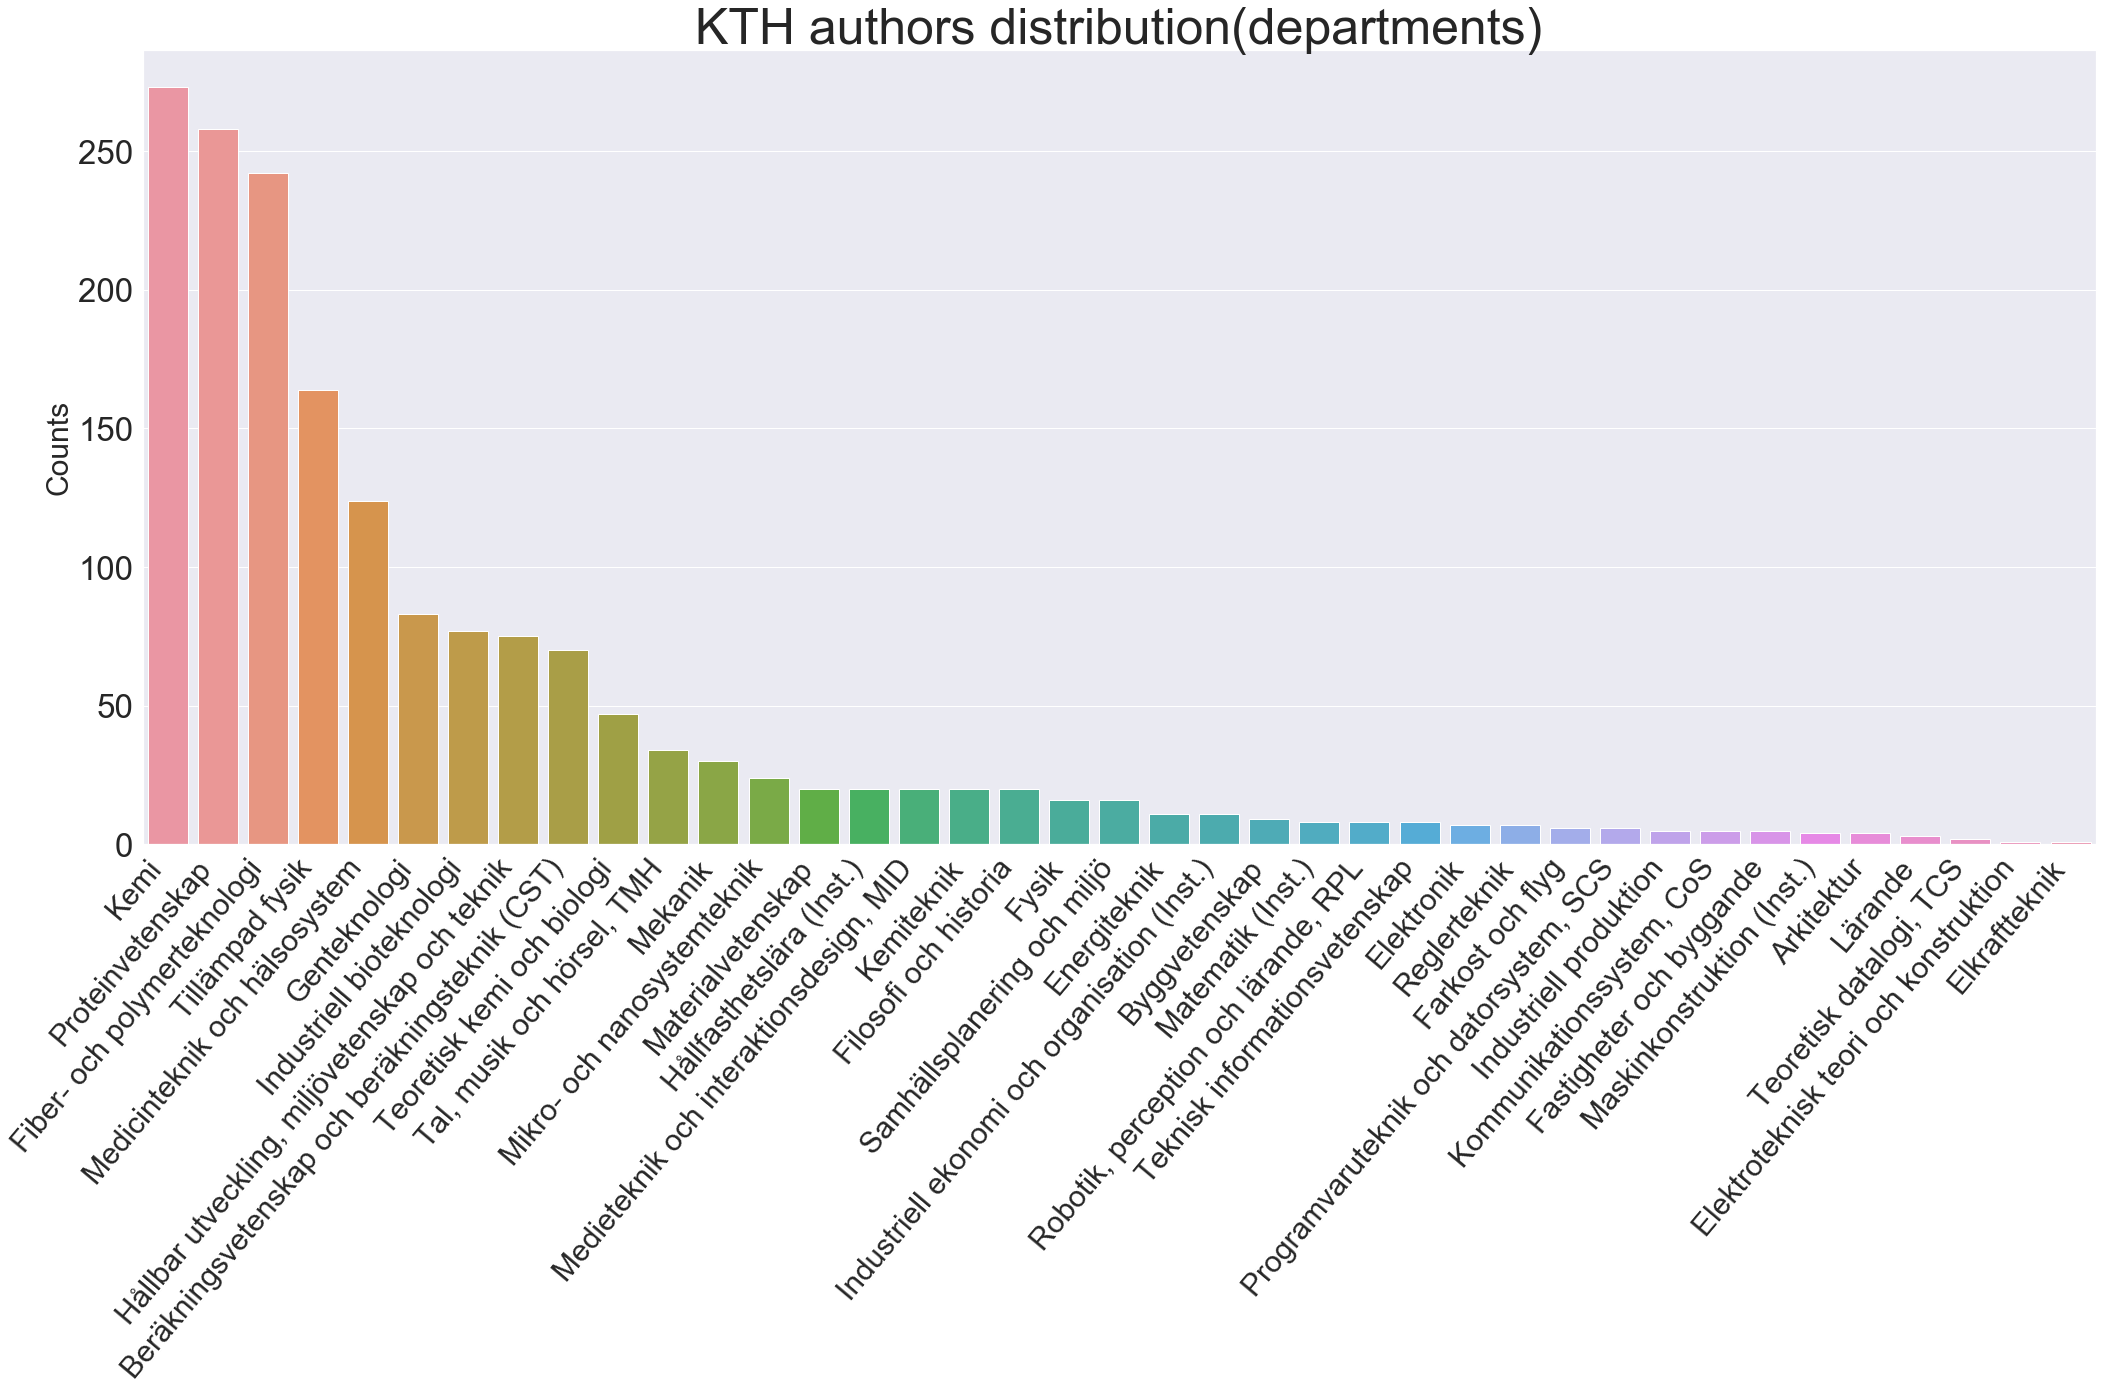

In [38]:
kth_school_s = pd.Series(np.array(df.Department)).value_counts().sort_values(ascending=False)
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(departments)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
#plt.show()
plt.savefig("assets/figures/articleDepartmentFinal")

In [124]:
len(kth_school_s.index)

39

In [125]:
39 - 5

34

In [122]:
kth_school_s.values.sum()

1744

In [126]:
1744 - 884

860

In [602]:
from collections import Counter

Import model

In [2]:
#model = gensim.models.Word2Vec.load("assets/doc2vecModels/KTH2004_i2000_w10_d500_plainTrain_small_noAuth/KTH2005_i2000_w10_d500_plainTrain_noAuth")
model = gensim.models.Word2Vec.load("assets/doc2vecModels/KTH2004_i2000_w10_d500_plainTrain_small_noAuth/KTH2005_i2000_w10_d500_plainTrain_noAuth")
doc_vec = model.docvecs.vectors_docs
doc_tag = list(model.docvecs.doctags.keys())
word_vectors = model.wv.vectors

pickle_o = pickle_obj(); 
id_to_auth = pickle_o.load("assets/dictionaries/id_to_all_auths_2004")
auth_to_id = pickle_o.load("assets/dictionaries/auths_to_all_id_2004")
id_to_auth = pickle_o.load("assets/dictionaries/id_to_all_auths_2004")
auth_to_id = pickle_o.load("assets/dictionaries/auths_to_all_id_2004")

negative_test = pickle_o.load("assets/goldenstandards/test_neg_aricles")
negative_pos = pickle_o.load("assets/goldenstandards/test_pos_aricles")

df_auth = pd.read_csv("assets/dataframes/KT_auth_2004")
df_abs = pd.read_csv("assets/dataframes/all_authors_df_2004")

In [611]:
word_vectors.shape

(61242, 500)

In [3]:
article_tag = [t for t in doc_tag if not t[0].islower()]

In [618]:
len(id_to_auth.keys())

7811

In [616]:
len(doc_tag)

23811

In [4]:
all_vec = model[article_tag]
tags =np.asarray(article_tag)

In [5]:
num_cluster=250

In [6]:
#BGMM = BayesianGaussianMixture(num_cluster, verbose=1)
#labels = BGMM.fit_predict(all_vec)

In [7]:
tag_centroid_map = dict(zip(tags, labels ))
list_of_clusters = get_cluster_members(num_cluster, tag_centroid_map)
df250 = convert_lists_2_df(list_of_clusters)

NameError: name 'labels' is not defined

In [8]:
def get_article_in_cluster(df):
    invalidChars = set(string.punctuation.replace("_", ""))
    df_articles = pd.DataFrame()
    length_list = list()
    for i, col in enumerate(df.columns):
        id_list = list()
        
        for row in df[col].dropna().tolist():
            if row is np.nan:
                break
            else:
                if not str(row).islower():
                    try:
                        id_list.append(row)
                    except:
                        print(row)
                else:
                    break
        length_list.append(len(id_list))
        df_new = pd.DataFrame({int(col): id_list})
        df_articles = pd.concat([df_articles, df_new], axis=1)
    return df_articles, np.array(length_list)

In [9]:
df_articles250, length_list250 = get_article_in_cluster(df250)

NameError: name 'df250' is not defined

In [10]:
#p = pickle_obj()
#p.save(length_list250, "assets/newApproach/length_list250")

In [11]:
df_articles250

NameError: name 'df_articles250' is not defined

In [12]:
#df_articles250.to_csv("assets/newApproach/df_articles250")

In [13]:
df_articles250 = pd.read_csv("assets/newApproach/df_articles250")
df_articles250.drop(["Unnamed: 0"],axis=1, inplace=True)


In [14]:
p = pickle_obj()
length_list250 = p.load("assets/newApproach/length_list250")

In [15]:
df_articles250.columns = df_articles250.columns.astype(str)

In [16]:
def sample_abstrac(cluster_nr, df,df_abs, max_nr_article=10, return_ix=True, keep_count=None, treshold=0):
    nr_article, article_id = get_nr_cluster(cluster_nr, df)
    all_ix = get_ix(nr_article, max_nr_article)
    IX = list()
    art_id = list()
    for i, (ix, ixx) in enumerate(zip(all_ix, article_id)):
        if return_ix:
            if i >= treshold:
                print("------------", i + keep_count, "   Article number:", str(int(float(ixx))))
                see_abstract(cluster_nr, ix, df, df_abs)
        
        IX.append(i + keep_count)
        if i >= treshold:
            art_id.append(str(int(float(ixx))))
    return IX, art_id

In [17]:
#df_articles250 = np.array(df_articles250).astype(float).astype(int).astype(str)

In [18]:
sum(length_list250 > 10)

139

In [19]:
1000 / 20_000

0.05

In [20]:
samples_articles_small = list()
cluster_to_article_small = dict()
for p in df_articles250.columns.values[length_list250 < 10]:
    print("|||||||||| Cluster: {} ||||||||||||||||||||".format(p) )
    #cluster_to_article[p], sample_id = sample_abstrac(str(p), df_articles150, df_abs, 10, keep_count=len(samples_articles10))
    cluster_to_article_small[p], sample_id = sample_abstrac(str(p), 
                                                      df_articles250, df_abs, 
                                                      10, keep_count=len(samples_articles_small))

    samples_articles_small += sample_id

|||||||||| Cluster: 0 ||||||||||||||||||||
------------ 0    Article number: 59874252
['We show how the spectral imaging framework should be modified to account for a high fraction of Compton interactions in low Z detector materials such as silicon. Using this framework, where deposited energies differ from actual photon energies, we compare the performance of a silicon strip detector, including the influence of scatter inside the detector and charge sharing but disregarding signal pileup, with an ideal energy integrating detector. We show that although the detection efficiency for silicon rapidly drops for the acceleration voltages encountered in clinical computed tomography practice, silicon detectors could perform on a par with ideal energy integrating detectors for routine imaging tasks. The use of spectrally sensitive detectors opens up the possibility for decomposition techniques such as k-edge imaging, and we show that the proposed modification of the spectral imaging framework 

['The aeroacoustic feedback loop establishing in a supersonic round jet impinging on a flat plate normally has been investigated by combining compressible large-eddy simulations and modelling of that loop. At the exit of a straight pipe nozzle of radius r(0), the jet is ideally expanded, and has a Mach number of 1.5 and a Reynolds number of 6 x 10(4). Four distances between the nozzle exit and the flat plate, equal to 6r(0), 8r(0), 10r(0) and 12r(0), have been considered. In this way, the variations of the convection velocity of the shear-layer turbulent structures according to the nozzle-to-plate distance are shown. In the spectra obtained inside and outside of the flow near the nozzle, several tones emerge at Strouhal numbers in agreement with measurements in the literature. At these frequencies, by applying Fourier decomposition to the pressure fields, hydrodynamic-acoustic standing waves containing a whole number of cells between the nozzle and the plate and axisymmetric or helical

['In online learning research, the theoretical Community of Inquiry framework has been used extensively to analyze processes of inquiry among learners and instructors within a community. This paper examines a special case of community of inquiry consisting of only one learner and one instructor. Together they engage in an online coaching discourse to form a relationship of inquiry. Within these relationships, coachees pass through processes of practical inquiry process while a coach supports the process. In this study, a framework and coding scheme were developed for use in a transcript coding procedure including 3,109 messages from an online coaching case in math for k-‘12 students. It is found that the elements of cognitive, teaching, and social presence, as well as the newly proposed emotional presence, which outlines a community of inquiry, comprise an effective structure for the analysis of one-to-one online coaching environments. The findings of this exploratory study suggest tha

In [21]:
print_abstract(407639)

NameError: name 'print_abstract' is not defined

In [55]:
c90 = [1234, 1235, 60469369, 47548610, 47337177, 69794790, 72892157]
c93 = [83685713]
c95 = [41344973]
#c11 (biofuels)
#112(Chlorella vulgais)
c119 = [86059527, 74532921]
#------
#c121 81989871(biodiesel), 72142040(biodiesel)
c121 = [81989871,72142040]
#------
c122 = [1099]
c133 = [49023681]
#--------------
#c136 72060659(auditory feedback in shared interfaces), 49980516(cognitive and behavioural effects)
#c136 = [72060659, 75147974, 49980516]
c136 = [72060659, 75147974]
#--------------
c137 = [83819169, 74356252, 65623167, 68814842]
c139 = [43246436,60101372, 86846007]
#-------------
#c141 67185461(As accumulation in human bo[dy), 87573660(health-damaging), 2589(psychosocial,health-specific ), 544(Occupational Health and Safety Management (OHSM))
#c141 = [67185461, 87573660, 2589, 544]
c141 = [67185461, 87573660, 2589]
#-------------
#--------------
#c147 50802930(biocomposites), 76613854(biomass/CO2)
c147 = [50802930, 76613854]
#--------------
c149 = [89538144]
c150 = [65470012]
c161 = [40596587]
c169 = [87580814]
#c176 1322(Information sought mainly for medical)
c176 = [1322]
#--------------
#191 1903(adapted cognitive, ), 49618922(biomass), 2696(Emotions have been confirmed to be a critical component)
c191  = [1903, 49618922, 2696]
#--------------
c196 = [46552357, 46279854, 67218957,49682616, 1018]
c198 = [59019957, 77977837]
c201 = [46395601]
c213 = [43372200, 43558909, 70350261, 78413016, 84834758, 87253728]
c218 = [75820740, 1147]
c223 = [60333470, 60333468, 61844017,47432789, 65491829]
#-------------
#c245 47808457(rice bran), 50567795(biomass), 51446653 ( biobased)
c245 = [47808457, 50567795, 51446653]
#------------

#c245 = []
#Industrial biotech?
c247 = [40649988, 49659812]
#c249 = []

In [56]:
#c0 59874252( clinical computed tomography practice)
c0 = [59874252, 61734495]
c4 = [63682443]

#43280475( are rare. Laddering interviews were made with respondents who visited open house sales of a tenant-owned )
#85955251 (Biodynamiska Produkter (BP))
c6 = [85955251, 89719929]
c14 = [45545769]
c18 = [59993340, 61837932, 67041011]
c23 = [48817206]
c41 = [2487, 59981860, 71554112]
c45 = [66555416, 76276425]
c47 = [1516, 61985399,47612349,68470393, 75130988, 75130989]
#c57 47479736(cognitive Gaussian), 64681542( cognitive system in a cellular network), 72292909(Cognitive radio (CR))
#c57 = []
c60 = [42983195]
c66 = [89956378, 84063028, 88008652, 88642694, 86164299, 82890156, 69471423,74489786 ]
c69 = [61951011]
c81 = [79194421]
#64412458 (ranging from optics to biology)
c82 = [64412458]
c89 = [86337804, 86353140, 69344048]

In [ ]:
valSmall = (c6 + c14 + c18 + c23 + c41 + c45 + c47 + c60 + c66 + c69 + c81 + c82 + c89 +
            c90 + c93 + c95 + c119 + c122 + c133 + c136 + c137 + c139 + c141 + c149 + c150 +
            c147 +c191 + c245 +
            c161 + c169 + c176 +c196 +c198 + c201 + c213 + c218 + c223 +c247)


In [57]:
valSmall = (c6 + c14 + c18 + c23 + c41 + c45 + c47 + c60 + c66 + c69 + c81 + c82 + c89 +
            c90 + c93 + c95 + c119 + c122 + c133 + c136 + c137 + c139 + c141 + c149 + c150 +
            c161 + c169 + c176 +c196 +c198 + c201 + c213 + c218 + c223 +c247)


In [58]:
samples_articles_small = np.array(samples_articles_small).astype(float).astype(int).astype(str)

In [59]:
labelsSmall = np.ones(samples_articles_small.shape[0])
mask_lsSmall = [True if int(a) in valSmall else False for a in samples_articles_small]
labelsSmall[mask_lsSmall] = 0

In [60]:
XSmall, ySmall = model[samples_articles_small], labelsSmall

In [61]:
samples_articles = list()
cluster_to_article = dict()
for p in df_articles250.columns.values[length_list250 > 10]:
    print("|||||||||| Cluster: {} ||||||||||||||||||||".format(p) )
    #cluster_to_article[p], sample_id = sample_abstrac(str(p), df_articles150, df_abs, 10, keep_count=len(samples_articles10))
    cluster_to_article[p], sample_id = sample_abstrac(str(p), 
                                                      df_articles250, df_abs, 
                                                      10, keep_count=len(samples_articles))

    samples_articles += sample_id

|||||||||| Cluster: 1 ||||||||||||||||||||
------------ 0    Article number: 58652110
['Three new sensitizers for photoelectrochemical solar cells were synthesized consisting of a triphenylamine donor, a rhodanine-3-acetic acid acceptor and a polyene connection. The conjugation length was systematically increased, which resulted in two effects: first, it led to a red-shift of the optical absorption of the dyes, resulting in an improved spectral overlap with the solar spectrum. Secondly, the oxidation potential decreased systematically. The excited state levels were, however, calculated to be nearly stationary. The experimental trends were in excellent agreement with density functional theory (DFT) computations. The photovoltaic performance of this set of dyes as sensitizers in mesoporous TiO<sub>2</sub> solar cells was investigated using electrolytes containing the iodide/triiodide redox couple. The dye with the best absorption characteristics showed the poorest solar cell efficiency, 

['In the present work, the adhesion between substrates treated with identical polyelectrolyte multilayers (PEM) from polyallylamine hydrochloride (PAR) and poly(acrylic acid) (PAA) was studied using atomic force microscopy (AFM) and the Surface force apparatus (SFA). The AFM measurements, conducted under wet conditions for PEMs formed at pH 7.5, showed a higher adhesion (pull-off force) when PAH was adsorbed in the outermost layers. There was also a difference depending on the Molecular mass of the polymers, demonstrating a greater adhesion for the low molecular mass combination of polyelectrolytes. Furthermore, die time in contact showed to be of importance, with increasing pull-off forces with contact time at maximum load. The SFA measurements were conducted under dry conditions, at 100% RH, and under wet conditions for PEMs adsorbed at pH 7.5/3.5. The SFA adhesion measurements showed that under dry conditions, the adhesive forces between two high energetic mica substrates were lower

['We show that major existing Monte Carlo burnup codes are numerically unstable in cycle calculations of critical reactors; spatial oscillations of the neutron flux can be observed even when relatively small time steps are used. This is caused by using the explicit Euler or midpoint method that appear to be numerically unstable with the step sizes common in cycle calculations. More stable methods that are common in deterministic burnup calculations, like the modified Euler method, can easily be introduced into the Monte Carlo burnup codes.']
------------ 392    Article number: 41053897
['Motivated by an increased interest in heavy liquid metal (lead or lead alloy) cooled fast reactors (LFR) and accelerator-driven system (ADS), the present paper presents a study on resistance characteristics and heat transfer performance of liquid lead bismuth eutectic (LBE) flow through a straight-tube heat exchanger and a U-tube heat exchanger. The investigation is performed on the TALL test facility 

['We have carried out a systematic theoretical investigation of Fe-doped AlH3 to study its magnetic properties and to assess the stability of the ferromagnetic phase in this material. All calculations were performed using the projector augmented-wave method and generalized-gradient approximation (GGA) as well as GGA+U. The magnetic moment is found to be constant at 1.1 mu(B) per Fe-atom in the ferromagnetic configuration for distances between adjacent Fe atoms varying from 3.25 angstrom to 7.41 angstrom. We conclude that the ferromagnetic phase in Fe-doped AlH3 is stable both for near and far configurations of Fe. The stability of the ferromagnetic phase is due to the holes created by Fe-doping and the larger level splitting of the interacting gap states within the ferromagnetic phase.']
------------ 577    Article number: 40979164
['In this work, we perform atomistic molecular dynamics simulations to assess the properties of small helium vacancy (He-V) and pure He clusters in body-cen

['A framework of finite element equations for strain gradient plasticity is presented. The theoretical framework requires plastic strain degrees of freedom in addition to displacements and a plane strain version is implemented into a commercial finite element code. A couple of different elements of quadrilateral type are examined and a few numerical issues are addressed related to these elements as well as to strain gradient plasticity theories in general. Numerical results are presented for an idealized cell model of a metal matrix composite under shear loading. It is shown that strengthening due to fiber size is captured but strengthening due to fiber shape is not. A few modelling aspects of this problem are discussed as well. An analytic solution is also presented which illustrates similarities to other theories.']
------------ 761    Article number: 41162164
['Commercially pure titanium (CP Ti), grade II, is subjected to hot compression at temperatures ranging from 673 to 973 K wit

['Solidification behavior of Al-Y and Al-Si were investigated for different melt temperatures. Levitation casting technique was used to achieve a cooling rate of around similar to 2000K/s during the experiment. Light optical microscopy (LOM) and Scanning electron microscopy (SEM) were used to analyze the samples. An energy dispersive system (EDS) analysis of SEM was performed on the samples to identify the phases. Plate like structure of Al8Y3 primary phase was observed at low melt temperature with small percentage of peritectic transformation of Al8Y3 and liquid melt into Al9Y2. A pre-dentritic star like crystal of Al3Y was observed in a fine eutectic matrix at very high melt temperature. Amount and number of primary Si crystals formed in a unit area during the solidification increases as the melt temperature increases. It is believed the melt temperature affects the solidification pattern by changing chemical short range order.']
------------ 938    Article number: 40768422
['Thermod

['We summarize the recent progress in laboratory-scale soft and hard x-ray micro imaging in Stockholm. Our soft x-ray work is based on liquid-jet laser-plasma sources which are combined with diffractive and multilayer optics to form laboratory x-ray microscopes. In the hard x-ray regime the imaging is based on a liquid-metal-jet electron-impact source which provides the necessary coherence to allow phase-contrast imaging with high fidelity.']
------------ 1124    Article number: 54720264
['Colloids play an important role when describing parameters of and processes within soils, sediments or aquifers due to their abundance and their high specific surface area. It is of great importance to visualize the morphology of the structures formed by these particles as close as possible to environmental conditions. With X-ray microscopy colloids from the environment can be imaged directly in aqueous media with high spatial resolution. We demonstrate the first use of a compact laboratory x-ray mic

["In this paper we consider a hypothetical severe accident in a Nordic-type boiling water reactor (BWR) at the stage of relocation of molten core materials to the lower head and subsequent debris bed and then melt pool formation. Nordic BWRs rely on reactor cavity flooding as a means for ex-vessel melt coolability and ultimate termination of the accident progression. However, different modes of vessel failure may result in different regimes of melt release from the vessel, which determine initial conditions for melt coolant interaction and eventually coolability of the debris bed. The goal of this study is to define if retention of decay-heated melt inside the reactor pressure vessel is possible and investigate modes of the vessel wall failure otherwise. The mode of failure is contingent upon the ultimate mechanical strength of the vessel structures under given mechanical and thermal loads and applied cooling measures. The influence of pool depth and respective transient thermal loads 

In [27]:
#c226  58960257 ( such as metabolism)

In [28]:
print_abstract(86125950)

NameError: name 'print_abstract' is not defined

In [29]:
c174 = [41075318, 40212624, 58947624, 58678125]
#c178 81301195
c178 = [74275918, 74275767, 59498460, 58917398, 42043992, 58436098, 68508305]
c182 = [88074507]
#----
#c184 40483101(olive kernel for bioenergy), 41188549(Chinese dolomites), 41460440(biological processes(1-3)), 59763029(biomass, olive kernel)
c184 = [40483101, 41188549, 41460440, 59763029]
#----
#---
#c186 40996454(wood fly ), 86125950(toxicity)
c186 = [40996454,86125950]
# c193 40820121(social and ecological activism), 41104278(ecosystems, biology), 67064729(human emotions in law)
#---
c194 = [478, 49175203]
c199 = [65833842, 73845449]
c202 = [58971137, 58806735, 89261282, 40658573, 41149496]
#-----
#c203 59035673(particles in the atmosphere on human health) x 41855142, 59754866
c203 = [59035673,41855142, 59754866]
#c203 = [1257]
#-------
c206 = [40577998, 60133815, 60640389, 40931890, 40973713, 40979710, 59077649, 41236817, 41915127, 58882968]
c208 = [40681927, 40506237, 40861340, 59086953, 41576275, 42055282, 43397090, 42101350, 43689124, 43789391]
c212 = [40490716, 40738094, 1206]
c216 = [58741169]
c221 = [79386192,68489880, 40921921, 63372732, 68492857, 59565947, 63377702, 68509725, 41586821, 67096500]
c225 = [67172292, 63267423, 45349683, 74224218, 47864387, 48516316]
#

In [30]:
#c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225

In [31]:
c124 = [48172766]
c131 = [41590443, 41590443, 41849788, 64245265, 41978967, 40660334, 41570667, 88973831, 40560477, 40785706]
c138 = [61183042, 43372051, 88742769, 89980045, 89956070, 44275504, 89395365, 89369509, 89995430, 65468143]
#c143 41635058(employees' psychological)
#c143 = []
#146 72076840(biopolymerization)
c146 = [41652082, 40861185, 72076840, 40629115]
#------
#c153 41760278(Biocomposites, biodegradation), 41822483(biodegradable)
c153 = [41760278, 59168034, 41822483]
#c153 = [41760278, 59168034]
#------
c154 = [82916011, 59087981, 41247572, 58716107, 40715428, 58625290, 89068089, 40849744, 40939806, 41059967]
#155  (1204) cognitive map
c166 = [64241675, 59628823, 41914638, 59506732, 41897640, 58969540, 41756621, 40214332, 78468892]
#---------------
#c168 40771221(legumes, meat, fish, cheese, and eggs), 60744841(ugar cane ethanol), 41599782(biofuel, bio-ethanol)
c168 = [40771221, 60744841, 41599782]
#---------------

In [32]:
#c124+c131 + c138 + c146 + c153 + c154 + c166

In [33]:
c83 = [78381912, 41694095, 41990282, 41361003, 40729625, 58713688, 41162814, 89322037, 81417162, 41950563]
c85 = [59221133, 43197683, 42365646, 88000204, 2355, 44322430, 60678254, 44712022, 60833657, 86310156]
c86 = [41009695]
#--------------------
#c97 43076458(Biobased), 65459141(Biomass), 64748695(biomass), 49229240(bio)
c97 =[43076458, 65459141, 64748695, 49229240]
#----------------
c102 = [67681093]
#c104 40397780(pharmaceuticals), 45876079(pharmaceutical), (46264550,65007596)theophylline(it's a drug)
c104 = [40397780, 45876079, 45876079, 46264550, 65007596]

c109 = [75652001]
c115 = [89093515, 42148198, 1677]
c118 = [81616148, 81586362, 58487454, 60006323]
#c120 robot vision
c120 = [65856013]

In [34]:
c20 = [41668656, 41533653, 58697397, 40566215, 59220861, 89424367, 41434698, 74337831]
c21 = [59131953, 40760289, 74188234, 59565690, 82182330, 59131960, 59204327, 41832151, 60099086, 1493]
#-------
#c32 40763975(biopolyelectrolyte), 40578141(biomacromolecule), 42128865(drug)
c32 = [41018663, 40763975, 40578141]
#c32 = [41018663]
#------
#c34 46869340(Virtual Human)
c36 = [41744330, 42131810, 65889857, 82258331, 65984968, 40726772, 82960473, 86588250, 41374962, 59764302]
c40 = [59983941]
#c46 2491(swarm optimization (PSO))
c46 = [41001603]
#c49 40593831(batch experiments)
c49 = [68490392, 40593831]
c54 = [58547186]
c56 = [41076368, 87907401, 43604813, 43688593, 65668203, 44765837, 61746083, 60912798]
#-------------
#c58 72197422(biogas), 1388(glucose fuel cell)
c58 = [72197422, 1388]
#-------
#---------------
#c70 79612970(Bamboo is an abundant plant), 65463830(bioethanol), 45164547(bio-gas, bio-methanol, and bio-ethanol)
#c70 = [78493817, 79612970, 65463830, 45164547, ]
c70 = [78493817]
#---------------
#c75 Photosystern II (PSII), 60272022(peroxidase enzymes), 59633399(bioinspired)
c75 = [41299384, 60272022, 60272022]

In [35]:
#c20 + c21 +  c32 + c36 + c40 + c46 + c49 + c54 + c56 + c70 + c75

In [36]:
c3 = [41773759]
#c7 49187545(normal speech)
c7 = [59929287]
#--------------
#c10 40520967(Picea glauca), 40934677(Picea Abies), 40871413(birch and Eucalyptus globulus), 41595484(Biomimetic,biocomposites), 
# 74059729 (nanowhiskers, bacterial cellulose, DNA), 67586971(biopolymer, arthropods)
#c10 = [40520967, 40934677, 40871413,41595484, 74059729, 67586971]
c10 = [41595484, 74059729, 67586971]
#--------------
c11 = [130]
#c12 45015784(biomedical CoCrMo alloy), 63650578(bioimaging applications)
c12 = [45015784]
#c13 63650578(bioimaging)
c13 = [63650578]
#c17 65964531(Bio-functions and bio-compatibility), 67277515(biorecognition, carbohydrate-protein)
#41837622 (protein r)
c17 = [65964531, 67277515, 41837622, 72450213, 42514828, 67262756, 43321572, 64429007, 60932437,60819104]

In [ ]:
LS = (c3 + c7 + c10 + c11 + c12 + c13 + c17 +
     c20 + c21 +  c32 + c36 + c40 + c46 + c49 + c54 + c56 + c70 + c75 +
     c83 + c85 + c86 + c102 + c104 + c109 + c115 + c118 + c120 + 
     c124+c131 + c138 + c146 + c153 + c154 + c166 +
      
       c184+c186+ c168+c97+c58 +
      
     c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225)
     

In [37]:
LS = (c3 + c7 + c10 + c11 + c12 + c13 + c17 +
     c20 + c21 +  c32 + c36 + c40 + c46 + c49 + c54 + c56 + c70 + c75 +
     c83 + c85 + c86 + c102 + c104 + c109 + c115 + c118 + c120 + 
     c124+c131 + c138 + c146 + c153 + c154 + c166 +
     c174 + c178 + c182 + c194 + c199 + c202+ c203+ c206 + c208 +c212 + c216 + c221 + c225)
     

In [38]:
samples_articles = np.array(samples_articles).astype(float).astype(int).astype(str)



In [39]:
df_test = pd.DataFrame()
df_val = pd.DataFrame()
train_ix, val_ix, test_ix = list(), list(), list()
for i, p in zip(range(int(len(samples_articles) / 10) - 1), df_articles250.columns.values[length_list250 > 10]):
    np.random.seed(i)
    ix = np.arange(10*i,(i+1)* 10)
    np.random.shuffle(ix)

    train_ix += list(ix[:6])
    
    
    test_ix += list(ix[6:9])
    
    df_new_test = pd.DataFrame({int(p): list(ix[6:9])})
    df_test = pd.concat([df_test, df_new_test], axis=1)
    
    val_ix += list(ix[9:])
    
    df_new_val = pd.DataFrame({int(p): list(ix[9:])})
    df_val = pd.concat([df_val, df_new_val], axis=1)


In [ ]:
df_test

In [ ]:
df_val

In [40]:
train_ix, val_ix, test_ix = np.sort(np.array(train_ix)), np.sort(np.array(val_ix)), np.sort(np.array(test_ix))

In [ ]:
#pickle_o.save(samples_articles.astype(str), "assets/newApproach/samples_articles_new")

In [41]:
labels = np.ones(samples_articles.shape[0])
mask_ls = [True if int(a) in LS else False for a in samples_articles]
labels[mask_ls] = 0

In [42]:
X_train, y_train = model[samples_articles[train_ix]], labels[train_ix]
X_test, y_test = model[samples_articles[test_ix]], labels[test_ix]
X_val, y_val = model[samples_articles[val_ix]], labels[val_ix]

In [ ]:
np.save("assets/newApproach/X_train_new",X_train), np.save("assets/newApproach/y_train_new",y_train)
np.save("assets/newApproach/X_test_new",X_test), np.save("assets/newApproach/y_test_new",y_test)
np.save("assets/newApproach/X_val_new",X_val), np.save("assets/newApproach/y_val_new",y_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [43]:
def prinst_cluster_status(X,y, labels):
    #b = GaussianNB()
    #b.fit(X,y)
    d = get_dnn()
    d.fit(X_train_c, y_train_c, batch_size=256, epochs=150,verbose=0)
    
    for c in df_val.columns:
        print("Cluster: {}".format(c))
        ix = df_test[c].values
        print(samples_articles[ix])
        X_, y_ = model[samples_articles[ix]], labels[ix]
        pred = b.predict(X_)
        print("real: ",y_)
        print("pred: ",pred)
        print(accuracy_score(pred, y_))
    
        #ix = df_val[c].values
        #print(samples_articles_arr[ix])
        #X_, y_ = model[samples_articles_arr[ix]], labels[ix]
        #pred = b.predict(X_)
        #print("real: ",y_)
        #print("pred: ",pred)
        #print(accuracy_score(pred, y_))
        #print("-------------------------")


In [ ]:
prinst_cluster_status(X_train_c, y_train_c, labels)

In [ ]:
_, _  = sample_abstrac(str(132), 
                                                      df_articles150, df_abs, 
                                                      10, keep_count=len(samples_articles))

In [ ]:
print_abstract(int(60802729))

In [ ]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])

In [ ]:
#40820121 might bs LS!

In [ ]:
X_train_c, y_train_c = X_train, y_train

In [ ]:
X_train_c, y_train_c = np.concatenate((X_train, XSmall, X_new)), np.concatenate((y_train, ySmall, y_new.ravel())) 

In [ ]:
np.save("assets/newApproach/X_train_new",X_train_c), np.save("assets/newApproach/y_train_new",y_train_c)

In [ ]:
prinst_cluster_status(X_train_c, y_train_c, labels)

In [63]:

m = LogisticRegression()
b = GaussianNB()
m.fit(X_train_c, y_train_c)
b.fit(X_train_c, y_train_c)

/home/ekvall/anaconda3/envs/kth-cluster/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
#val_pred = m.predict(X_val)
#print(accuracy_score(val_pred, y_val))

val_pred = b.predict(X_val)
print(accuracy_score(val_pred, y_val))

#test_pred = m.predict(X_test)
#print(accuracy_score(test_pred, y_test))

test_pred = b.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.9855072463768116
0.961352657004831


In [65]:
val_pred = b.predict(XSmall)
print(accuracy_score(val_pred, ySmall))

0.9498861047835991


In [ ]:
print(samples_articles_small[np.invert(val_pred == ySmall)])
print("Real: ",ySmall[np.invert(val_pred == ySmall)])
print("Pred: ",val_pred[np.invert(val_pred == ySmall)])

In [ ]:
print_abstract(int(49354935))

In [ ]:
np.save("assets/newApproach/X_train",X_train_c), np.save("assets/newApproach/y_train",y_train_c)

In [ ]:
additonal_articles = more_articles_143 + more_articles_142 + more_articles_128 + more_articles_112 + more_articles_101



In [ ]:
additonal_articles = additonal_articles + more_articles_99 + more_articles_26 + more_articles_5

In [ ]:
pickle_o.save(additonal_articles,"assets/newApproach/additonal_articles")

In [44]:
X_new, y_new = np.load("assets/kerasArray/sampleX_iter26970_val0.949_test0.942.npy"), np.load("assets/kerasArray/sampley_iter26970_val0.949_test0.942.npy")



In [62]:
#X_train_c, y_train_c = np.concatenate((X_train, XSmall, X_new)), np.concatenate((y_train, ySmall, y_new.ravel())) 
#X_train_c, y_train_c = np.concatenate((X_train, XSmall, X_new, X_test)), np.concatenate((y_train, ySmall, y_new.ravel(), y_test)) 
X_train_c, y_train_c = np.concatenate((X_train, XSmall, X_test, X_val)), np.concatenate((y_train, ySmall, y_test, y_val)) 
#X_train_c, y_train_c = np.concatenate((X_train, XSmall, X_test)), np.concatenate((y_train, ySmall, y_test)) 

In [ ]:
1 - sum(y_val==0) / (sum(y_val==0) + sum(y_val==1))

In [ ]:
1 - sum(y_test==0) / (sum(y_test==0) + sum(y_test==1))

In [ ]:
1 - sum(ySmall==0) / (sum(ySmall==0) + sum(ySmall==1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import f1_score
from keras.layers.normalization import BatchNormalization
def get_dnn():
    dnn = Sequential()
    dnn.add(Dense(500, input_dim=500, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(200, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(50, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(1, activation='sigmoid'))

    dnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
    
    return dnn

In [ ]:
from BayesDNNClassifier import  BayesDNNClassifier

In [ ]:
bddn = BayesDNNClassifier()

In [ ]:
bddn.fit(X_train_c, y_train_c,2500, 256, True)

In [ ]:
bddn.pred

In [ ]:
d = get_dnn()

In [ ]:
d.load_weights("assets/kerasmodels/model_weights_iter6770_val0.957_test0.923.h5")

In [ ]:
d.fit(X_train_c, y_train_c, batch_size=256, epochs=50)

In [ ]:
test_pred = d.predict_classes(X_test)
accuracy_score(test_pred, y_test)

In [ ]:
test_pred = d.predict_classes(X_val)
accuracy_score(test_pred, y_val)

In [ ]:
test_pred = d.predict_classes(XSmall)
accuracy_score(test_pred, ySmall)

In [66]:
unlabeled_ids = list(set(article_tag) - set(samples_articles))
unlabeled_vec = model[unlabeled_ids]

In [67]:
#pred_un = d.predict_classes(unlabeled_vec)
pred_un = b.predict(unlabeled_vec)
lfix1 = pred_un == 0
ls = np.array(unlabeled_ids)[list(lfix1.ravel())].astype(int)
len(ls)

2995

In [571]:
len(all_ls)

3294

In [572]:
all_ls = list(ls) + valSmall + LS

In [573]:
def get_author_storage(articles, df_abs, id_to_auth):
    all_authors_name = list()
    all_authors_id = list()
    author_to_docid = dict()
    for l in articles:
        kth_id = df_abs[df_abs.Doc_id == int(l)].KTH_id.str.split(":").tolist()[0]
        all_authors_id += kth_id
        [id_to_auth[ki] for ki in kth_id]
        all_authors_name += [id_to_auth[ki] for ki in kth_id]
        for ki in kth_id:
            if id_to_auth[ki] not in list(author_to_docid.keys()):
                author_to_docid[id_to_auth[ki]] = str(l)
            else:
                author_to_docid[id_to_auth[ki]] = author_to_docid[id_to_auth[ki]] + ":" + str(l)
    return all_authors_name, all_authors_id, author_to_docid

In [601]:
all_authors_name, all_authors_id, author_to_docid = get_author_storage(all_ls, df_abs, id_to_auth)

In [574]:
all_authors_name = list()
all_authors_id = list()
author_to_docid = dict()
for l in all_ls:
    kth_id = df_abs[df_abs.Doc_id == int(l)].KTH_id.str.split(":").tolist()[0]
    all_authors_id += kth_id
    [id_to_auth[ki] for ki in kth_id]
    all_authors_name += [id_to_auth[ki] for ki in kth_id]
    for ki in kth_id:
        if id_to_auth[ki] not in list(author_to_docid.keys()):
            author_to_docid[id_to_auth[ki]] = str(l)
        else:
            author_to_docid[id_to_auth[ki]] = author_to_docid[id_to_auth[ki]] + ":" + str(l)

In [575]:
list_ids = list(set(all_authors_id))

In [603]:
def get_list_of_departments(list_ids, df_auth, id_to_auth, id_to_dep):
    deps_list = list()
    id_to_dep = dict()
    for idz in list_ids:
        deps = df_auth[df_auth.KTH_id == str(idz)].dep_name.tolist()
        most_common = Counter(deps).most_common()
        if str(most_common[0][0]) == "nan":
            if len(most_common) == 1:
                element = str(most_common[0][0])
            else:
                element = str(most_common[1][0])
        else:
            element = str(most_common[0][0])
        id_to_dep[id_to_auth[str(idz)]] = element
        deps_list.append(element)
    return deps_list, id_to_dep
    

In [576]:
deps_list = list()
id_to_dep = dict()
for idz in list_ids:
    deps = df_auth[df_auth.KTH_id == str(idz)].dep_name.tolist()
    most_common = Counter(deps).most_common()
    if str(most_common[0][0]) == "nan":
        if len(most_common) == 1:
            element = str(most_common[0][0])
        else:
            element = str(most_common[1][0])
    else:
        element = str(most_common[0][0])
    id_to_dep[id_to_auth[str(idz)]] = element
    deps_list.append(element)

In [577]:
sorted_dep = list()
for idx in author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])

In [578]:
kth_school_s = pd.Series(np.array(deps_list)).valudde_counts().sort_values(ascending=False)

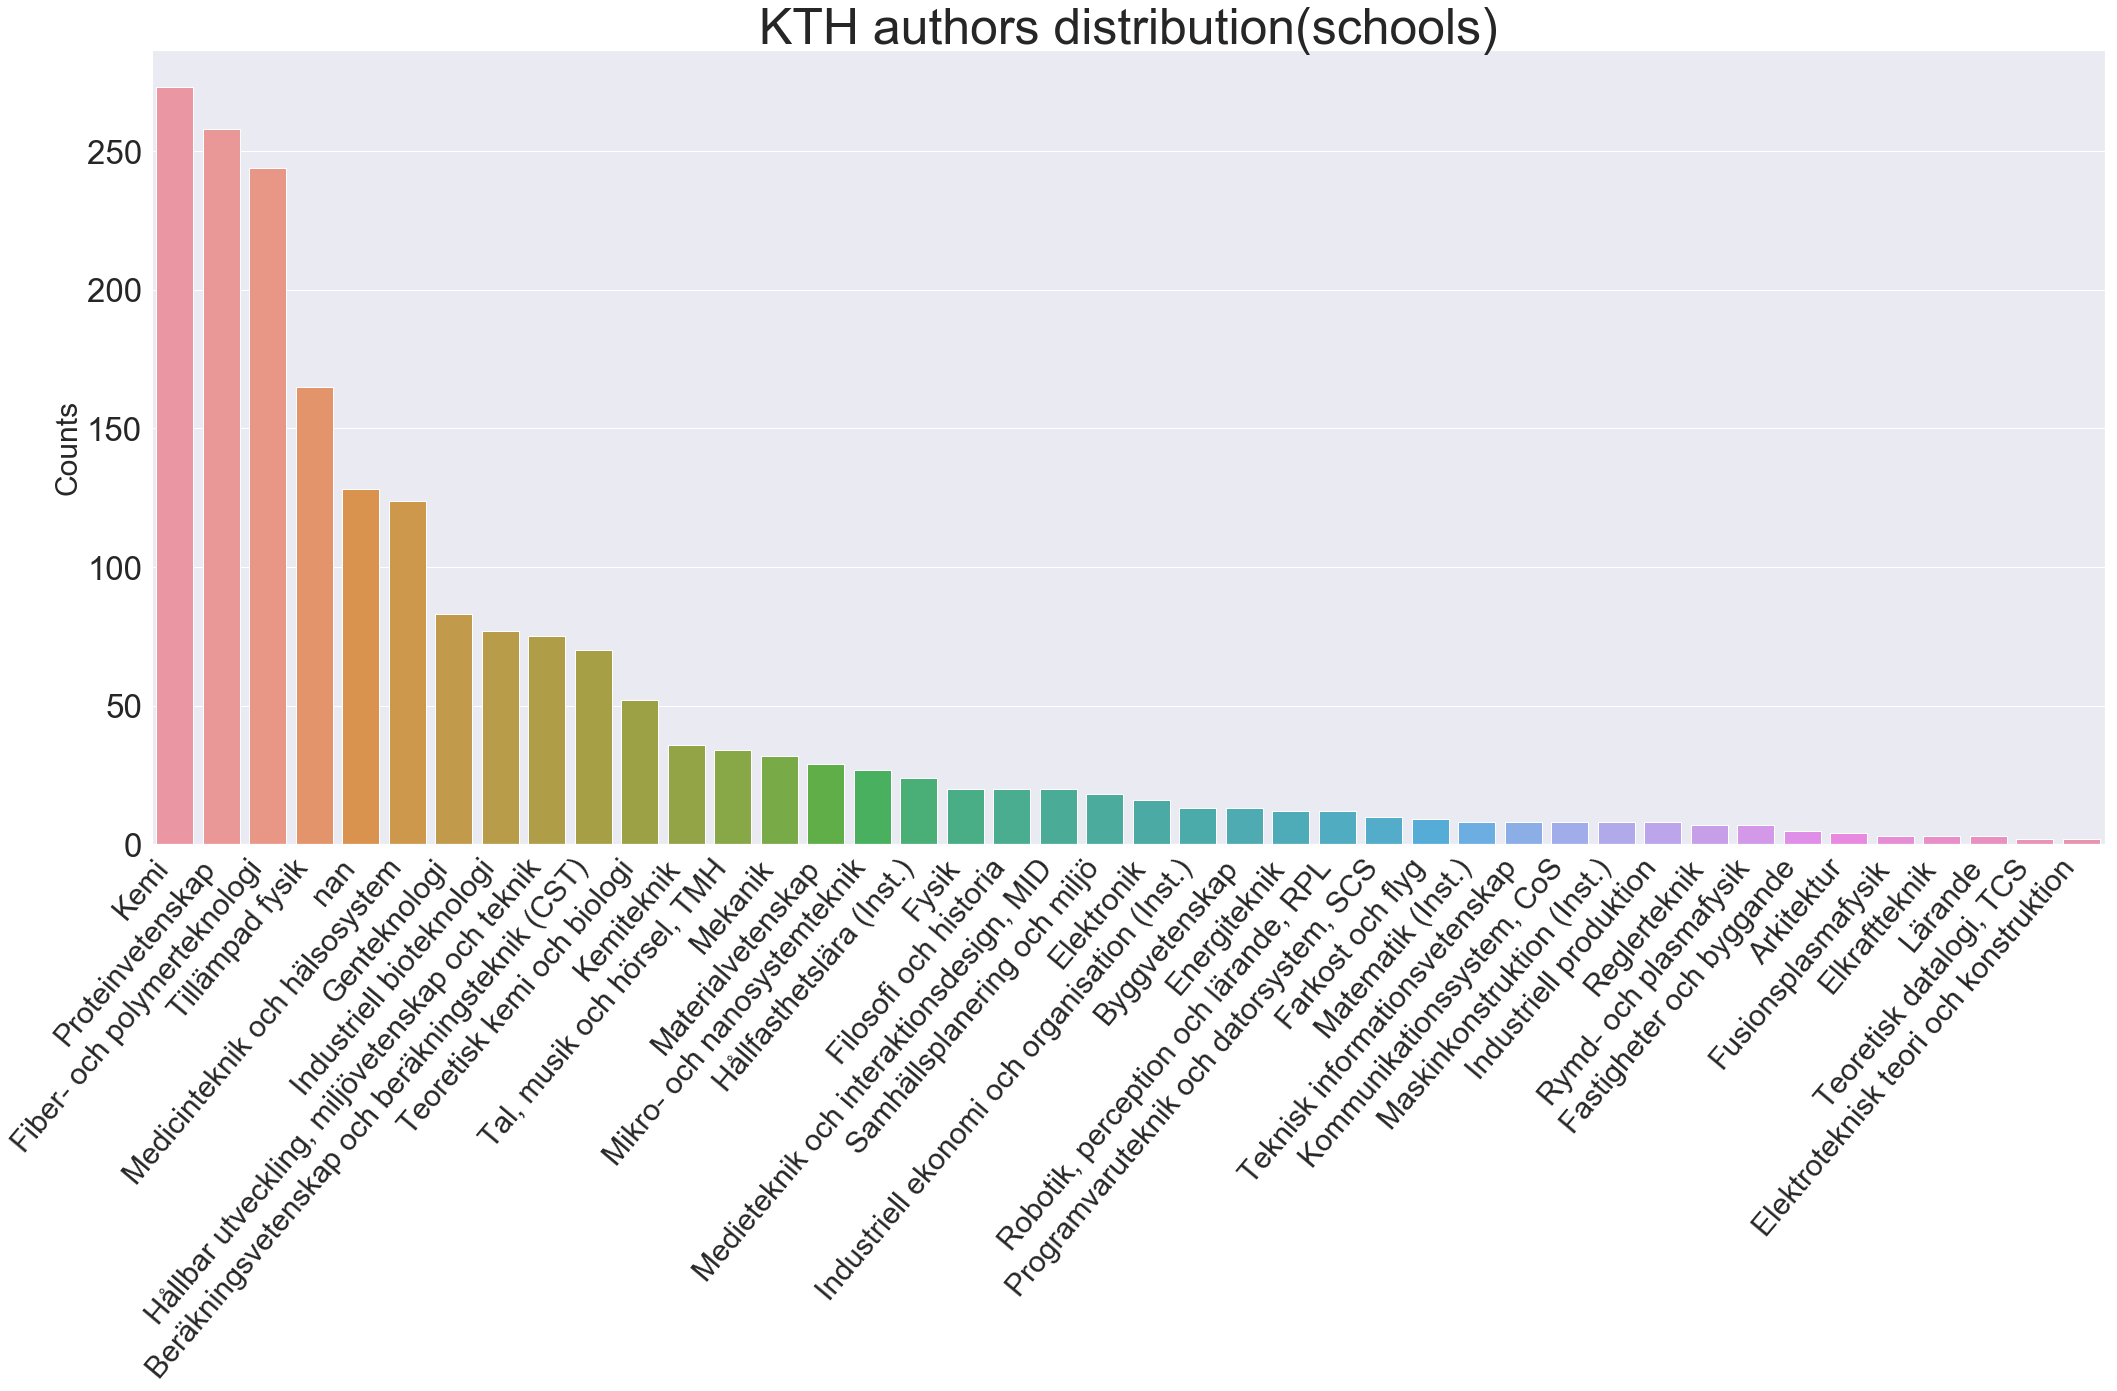

In [579]:
kth_school_s = pd.Series(np.array(deps_list)).value_counts().sort_values(ascending=False)
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()

In [580]:
kth_school_s

Kemi                                              273
Proteinvetenskap                                  258
Fiber- och polymerteknologi                       244
Tillämpad fysik                                   165
nan                                               128
Medicinteknik och hälsosystem                     124
Genteknologi                                       83
Industriell bioteknologi                           77
Hållbar utveckling, miljövetenskap och teknik      75
Beräkningsvetenskap och beräkningsteknik (CST)     70
Teoretisk kemi och biologi                         52
Kemiteknik                                         36
Tal, musik och hörsel, TMH                         34
Mekanik                                            32
Materialvetenskap                                  29
Mikro- och nanosystemteknik                        27
Hållfasthetslära (Inst.)                           24
Fysik                                              20
Filosofi och historia       

In [581]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])
def print_all_abstracts(ids):
    for i in ids:
        print("-----------------------(", int(i), ")---------------------")
        print_abstract(int(i))
def get_ids_from_dep(dep):
    ids = list()
    for i in end_product[end_product.Department == str(dep)].Doc_id.values:
        S = i.split(":")
        if len(S) >1:
            for s in S:
                ids.append(s)
        else:
            ids.append(S[0])
    return list(set(ids))

sorted_dep = list()
for idx in author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])
from pandas import DataFrame
end_product = DataFrame({'Author': list(author_to_docid.keys()), 'Doc_id': list(author_to_docid.values()), 'Department':sorted_dep})

In [582]:
end_product

Author  \
0               Herman, Pawel Andrzej   
1                         Sanden, Tor   
2                   Salomonsson, Lina   
3                   Widengren, Jerker   
4                        Liang, Lijun   
5          Dedinaite, Andra(u1497iqh)   
6                   Claessson, M. Per   
7                  Al Moubayed, Samer   
8                        Edlund, Jens   
9                       Beskow, Jonas   
10                     Jonsson, Hakan   
11                     Uhlen, Mathias   
12             AnderssonSvahn, Helene   
13                      Azhar, Shoaib   
14                          Hua, Geng   
15                     Odelius, Karin   
16                        Wu, Jiechen   
17                Malmstrom, Maria E.   
18                    Dover, Sara  E.   
19                   Larsson, Matilda   
20                    Bjallmark, Anna   
21               Zhou, Yang(u1v2i3eb)   
22                    Kuang, Guanglin   
23                       Tu, Yao-quan   
24                         Eiken, Ola   
25                    Kolegard, Roger   
26              Zhang, Yang(u1zafljf)   
27                         Xie, Sheng   
28                        Yan, Mingdi   
29                     Ramstrom, Olof   
...                               ...   
1940                   Widyan, Khalid   
1941               Jovanovic, Biljana   
1942                   Asempah, Isaac   
1943                  Dudorov, Sergey   
1944                 Lindblom, Magnus   
1945                Takman, Per A. C.   
1946                Sandberg, AnnSofi   
1947               Li, Xin(ux1637756)   
1948             Jiang, Li(ux1637757)   
1949                      Zhan, Q. Q.   
1950                Li, Xin(u174m0ju)   
1951                        Jiang, L.   
1952                   Gharibi, Arash   
1953                    Olander, Lars   
1954                  Wahlstrom, Jens   
1955          Assefaw-Redda, Yohannes   
1956                   Zhang, Zhi-Bin   
1957                    Zhang, Shi-Li   
1958                     Spens, Erika   
1959                  Haggstrom, Lena   
1960               Rudsander, Ulla J.   
1961                    Ekblad, Torun   
1962              Tschapalda, Kirsten   
1963  Ehsani, Amir Houshang(u1h0qvzn)   
1964  Ehsani, Amir Houshang(u1eozu4z)   
1965                Grondahl, Fredrik   
1966                    Kemi, Cecilia   
1967               Baumann, Martin J.   
1968             Lundback, Anna-Karin   
1969                   Greffe, Lionel   

                                                 Doc_id  \
0     85236551:75150162:479:85126921:1093:68940495:8...   
1          59817430:43500507:41075318:58971137:40577998   
2                                              59817430   
3     59817430:77298221:67451015:45467188:87862399:1...   
4                   52533253:83932094:81975995:71655302   
5     62756025:67483338:46670153:67145116:82045554:8...   
6     62756025:49285712:67483338:87287708:46670153:4...   
7                                                  1933   
8                  1933:2760:41588126:63497592:59220861   
9                                    1933:2968:59220861   
10    60437363:856:49245538:81205123:60086500:495068...   
11    60437363:76813495:67113779:73010621:50942948:5...   
12    60437363:289:2370:49245538:85429205:81205123:6...   
13         70234184:51029785:81486223:61486751:80725168   
14                           82185558:83372830:87347257   
15    82185558:48402516:49227549:83372830:87347257:6...   
16                                    51916563:53171847   
17                                    51916563:53171847   
18                                             83887832   
19    42890364:84995835:66157343:45934183:58704407:4...   
20    42890364:69471423:58704407:40259624:60561540:6...   
21                                             87117911   
22    87117911:88898965:83932094:52252194:89344035:8...   
23    87117911:88898965:83932094:1670:86571831:45990...   
24    7056793

In [214]:
#Elektroteknisk teori och konstruktion: 66742430
#Elkraftteknik: 81243923
#Fusionsplasmafysik: all
#Rymd- och plasmafysik: all
#Industriell produktion: 79492531, 1596
#Maskinkonstruktion (Inst.): 59754866, 52163283, 665
#Kommunikationssystem, CoS: 43059572, 72439808, 2171
#Farkost och flyg: 41994047, 50144774
#Programvaruteknik och datorsystem, SCS: 85115078, 1003
#Robotik, perception och lärande, RPL: 449, 593
#Energiteknik: 87639922
#Byggvetenskap: 51663357, 2865, 200, 43046211
#Industriell ekonomi och organisation (Inst.): (not sure, 42115109,2580,983,77280747,67947331), 59910619, 47133853, 1596,  
#Elektronik: 69168901, 72439808, 59584766, 2992, 45777448
#Samhällsplanering och miljö: 59503066
#Filosofi och historia: (maybe: 2523, 52684117)
#Fysik: 82593299, 51604588
#Hållfasthetslära (Inst.): 70235941, 44412528, 70235941, 72197517, 44412528, 45033187, 
#Mikro- och nanosystemteknik: 43284360, 2311
#Materialvetenskap: 46797420, 48373971, 50877969, 61446579, 89729044
#Mekanik: 2232, 76373899 
#Tal, musik och hörsel, TMH: 72455304, 

#Kemiteknik: 52306927, 45342423, 80442709, 75562316, 49659812, 67088872, 66316829, 52306927, 45342423, 60826154,
#60826154, 58809440, 49659812, 89662992, 83366556, 88994011, 77767273   (maybe: 82559025)

#Teoretisk kemi och biologi: #50278624, 67521081, 68975986, 58734237, 78084065, 81995879, 46797420, 78070717, 41149496, 75381374,
#75433652, 79602920, 76627357, 71975463, 80669251


In [548]:
remove_article = [66742430, 81243923, 79492531, 1596, 59754866, 52163283, 665, 43059572, 72439808, 2171,
                 41994047, 50144774, 85115078, 1003, 449, 593, 87639922, 51663357, 2865, 200, 43046211,
                 59910619, 47133853, 1596, 69168901, 72439808, 59584766, 2992, 45777448, 59503066, 
                 82593299, 51604588, 70235941, 44412528, 70235941, 72197517, 44412528, 45033187,43284360, 2311,
                 46797420, 48373971, 50877969, 61446579, 89729044, 2232, 76373899, 72455304,52306927, 45342423,
                 80442709, 75562316, 49659812, 67088872, 66316829, 52306927, 45342423, 60826154,60826154,
                 58809440, 49659812, 89662992, 83366556, 88994011, 77767273,
                 50278624, 67521081, 68975986, 58734237, 78084065, 81995879, 46797420, 78070717, 41149496, 75381374,
                 75433652, 79602920, 76627357, 71975463, 80669251]

In [554]:
S1 = [s.split(":") for s in end_product[end_product.Department == "Fusionsplasmafysik"].Doc_id.tolist()]
S2 = [s.split(":") for s in end_product[end_product.Department == "Rymd- och plasmafysik"].Doc_id.tolist()]

In [558]:
more_articles_to_remove = list()
for l in (S1 + S2):
    more_articles_to_remove += l

In [593]:
more_articles_to_remove = list(set(np.array(more_articles_to_remove + remove_article).astype(int)))

In [595]:
print_abstract(int(81975995))

Owing to unique morphology, ultrasmall lateral sizes, and exceptional properties, graphene quantum dots (GQDs) hold great potential in many applications, especially in the field of electrochemical biosensors, bioimaging, drug delivery, et cetera. Its biosafety and potential cytotoxicity to human and animal cells has been a growing concern in recent years. In this work, the potential cytotoxicity of GQDs was evaluated by molecular dynamics simulations. Our simulation demonstrates that small size GQDs could easily permeate into the lipid membrane in a vertical way. It is relatively difficult to permeate into the lipid membrane for GQDs that are larger than GQD61 on the nanosecond time-scale. The thickness of the POPC membrane could even be affected by the small size of GQDs. Free energy calculations revealed that the free energy barrier of GQD permeation through the lipid membrane could greatly change with the change of GQD size. Under high GQD concentration, the GQD molecules could rapi

In [604]:
_, final_all_authors_id, final_author_to_docid = get_author_storage(list(set(all_ls) - set(more_articles_to_remove)), df_abs, id_to_auth)

In [608]:
final_list_ids = list(set(final_all_authors_id))

In [609]:
final_deps_list, _ = get_list_of_departments(final_list_ids, df_auth, id_to_auth, id_to_dep)

In [605]:
sorted_dep = list()
for idx in final_author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])
from pandas import DataFrame
final_end_product = DataFrame({'Author': list(final_author_to_docid.keys()), 'Doc_id': list(final_author_to_docid.values()), 'Department':sorted_dep})

In [606]:
end_product

Author  \
0               Herman, Pawel Andrzej   
1                         Sanden, Tor   
2                   Salomonsson, Lina   
3                   Widengren, Jerker   
4                        Liang, Lijun   
5          Dedinaite, Andra(u1497iqh)   
6                   Claessson, M. Per   
7                  Al Moubayed, Samer   
8                        Edlund, Jens   
9                       Beskow, Jonas   
10                     Jonsson, Hakan   
11                     Uhlen, Mathias   
12             AnderssonSvahn, Helene   
13                      Azhar, Shoaib   
14                          Hua, Geng   
15                     Odelius, Karin   
16                        Wu, Jiechen   
17                Malmstrom, Maria E.   
18                    Dover, Sara  E.   
19                   Larsson, Matilda   
20                    Bjallmark, Anna   
21               Zhou, Yang(u1v2i3eb)   
22                    Kuang, Guanglin   
23                       Tu, Yao-quan   
24                         Eiken, Ola   
25                    Kolegard, Roger   
26              Zhang, Yang(u1zafljf)   
27                         Xie, Sheng   
28                        Yan, Mingdi   
29                     Ramstrom, Olof   
...                               ...   
1940                   Widyan, Khalid   
1941               Jovanovic, Biljana   
1942                   Asempah, Isaac   
1943                  Dudorov, Sergey   
1944                 Lindblom, Magnus   
1945                Takman, Per A. C.   
1946                Sandberg, AnnSofi   
1947               Li, Xin(ux1637756)   
1948             Jiang, Li(ux1637757)   
1949                      Zhan, Q. Q.   
1950                Li, Xin(u174m0ju)   
1951                        Jiang, L.   
1952                   Gharibi, Arash   
1953                    Olander, Lars   
1954                  Wahlstrom, Jens   
1955          Assefaw-Redda, Yohannes   
1956                   Zhang, Zhi-Bin   
1957                    Zhang, Shi-Li   
1958                     Spens, Erika   
1959                  Haggstrom, Lena   
1960               Rudsander, Ulla J.   
1961                    Ekblad, Torun   
1962              Tschapalda, Kirsten   
1963  Ehsani, Amir Houshang(u1h0qvzn)   
1964  Ehsani, Amir Houshang(u1eozu4z)   
1965                Grondahl, Fredrik   
1966                    Kemi, Cecilia   
1967               Baumann, Martin J.   
1968             Lundback, Anna-Karin   
1969                   Greffe, Lionel   

                                                 Doc_id  \
0     85236551:75150162:479:85126921:1093:68940495:8...   
1          59817430:43500507:41075318:58971137:40577998   
2                                              59817430   
3     59817430:77298221:67451015:45467188:87862399:1...   
4                   52533253:83932094:81975995:71655302   
5     62756025:67483338:46670153:67145116:82045554:8...   
6     62756025:49285712:67483338:87287708:46670153:4...   
7                                                  1933   
8                  1933:2760:41588126:63497592:59220861   
9                                    1933:2968:59220861   
10    60437363:856:49245538:81205123:60086500:495068...   
11    60437363:76813495:67113779:73010621:50942948:5...   
12    60437363:289:2370:49245538:85429205:81205123:6...   
13         70234184:51029785:81486223:61486751:80725168   
14                           82185558:83372830:87347257   
15    82185558:48402516:49227549:83372830:87347257:6...   
16                                    51916563:53171847   
17                                    51916563:53171847   
18                                             83887832   
19    42890364:84995835:66157343:45934183:58704407:4...   
20    42890364:69471423:58704407:40259624:60561540:6...   
21                                             87117911   
22    87117911:88898965:83932094:52252194:89344035:8...   
23    87117911:88898965:83932094:1670:86571831:45990...   
24    7056793

In [619]:
final_end_product.to_csv("assets/finalproduct/finalproductDf")

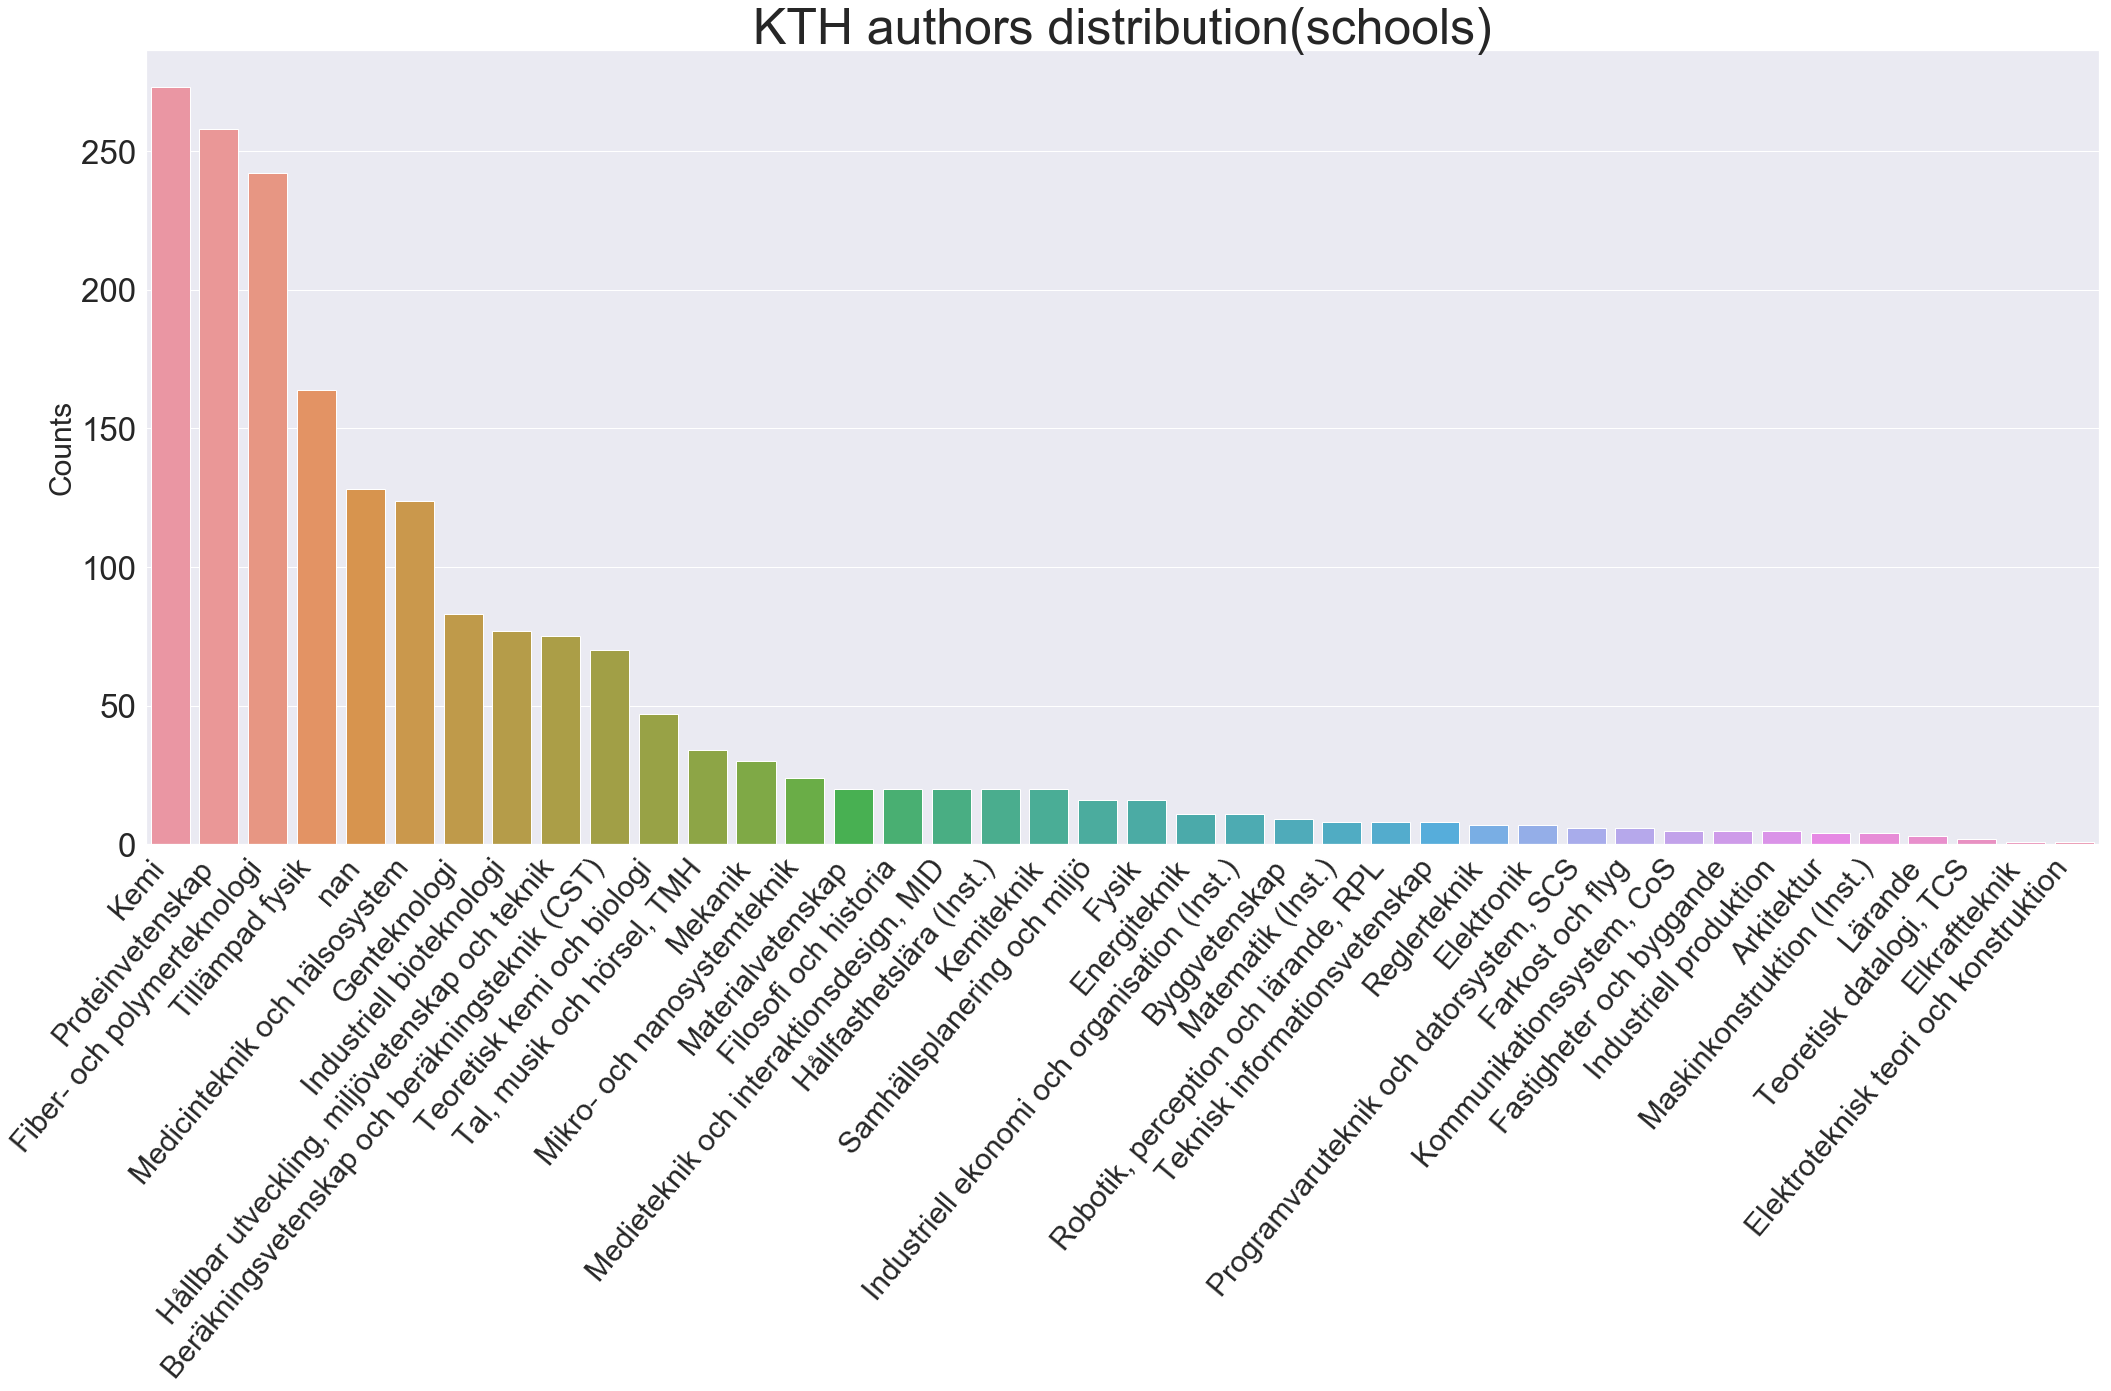

In [610]:
kth_school_s = pd.Series(np.array(final_deps_list)).value_counts().sort_values(ascending=False)
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()

In [114]:
print_all_abstracts(get_ids_from_dep("Reglerteknik"))

-----------------------( 76276425 )---------------------
Mammalian cell lines are characterized by a complex and flexible metabolism. A single model that could describe the variations in metabolic behavior triggered by variations in the culture conditions would be a precious tool in bioprocess development. In this paper, we introduce an approach to generate a poly-pathway model and use it to simulate diverse metabolic states triggered in response to removal, reduction or doubling of amino acids in the culture medium of an antibody-producing CHO cell line. Macro-reactions were obtained from a metabolic network via elementary flux mode enumeration and the fluxes were modeled by kinetic equations with saturation and inhibition effects from external medium components. Importantly, one set of kinetic parameters was estimated using experimental data of the multiple metabolic states. A good fit between the model and the data was obtained for the majority of the metabolites and the experimenta

In [78]:
cluster_count = dict()
cluster_count_list = list()
for i, l in enumerate(all_ls):
    for c in df_articles250.columns.values:
        cluster_art = list(df_articles250[str(c)].dropna().astype(int))
        if int(l) in cluster_art:
            if c in list(cluster_count.keys()):
                cluster_count[c] +=1
            else:
                cluster_count[c] =1
            cluster_count_list.append(c)
    if i % 100==0:
        print("Iteration {}".format(i))

        
    


Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100
Iteration 3200


In [119]:
cluster_series = pd.Series(np.array(cluster_count_list)).value_counts().sort_values(ascending=False)

NameError: name 'cluster_count_list' is not defined

In [118]:
plt.figure(figsize=(45,23))
ax = sns.barplot(cluster_series.index,cluster_series.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=20)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()

NameError: name 'cluster_series' is not defined

<Figure size 3240x1656 with 0 Axes>

In [ ]:
np.arange(len(objects))

In [ ]:
objects = tuple(cluster_count.keys())
y_pos = np.arange(len(objects))
performance = list(cluster_count.keys())

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [ ]:
cluster_count

In [ ]:
cluster_count

In [ ]:
unlabeled_ids = list(set(article_tag) - set(samples_articles))
unlabeled_vec = model[unlabeled_ids]

In [ ]:
negative_val = np.load("assets/goldenstandards/NLS_val.npy")
negative_test = np.load("assets/goldenstandards/NLS_test.npy")
postive_val = np.load("assets/goldenstandards/LS_val.npy")
positve_test = np.load("assets/goldenstandards/LS_test.npy")

In [ ]:
more_id = np.concatenate((positve_test, postive_val, negative_test, negative_val))
#more_y = np.concatenate((np.zeros(len(positve_test)), np.zeros(len(postive_val)), np.ones(len(negative_test)), np.ones(len(negative_val))))
more_y = np.concatenate((np.ones(len(positve_test)), np.ones(len(postive_val)), np.zeros(len(negative_test)), np.zeros(len(negative_val))))


In [ ]:
new_mas = [False if a in list(unlabeled_ids) else True for a in more_id ]

In [ ]:
new_mas

In [ ]:
md = set(list(more_data.astype(str)))

In [ ]:
len(md)

In [ ]:
len(set(unlabeled_ids) & md)

In [ ]:
unlabeled_vec = model[unlabeled_ids]

In [ ]:
unlabeled_vec.shape

In [ ]:
train_vec.shape

In [ ]:
318 / 23175 * 100

In [ ]:
X_new, y_new = np.load("assets/kerasArray/sampleX_iter2600_val0.915_test0.901.npy"), np.load("assets/kerasArray/sampley_iter2600_val0.915_test0.901.npy")

In [ ]:
#X_train_c, y_train_c = np.concatenate((X_train, X_new, X_test, X_val)), np.concatenate((y_train, y_new.ravel(),  y_test, y_val))
X_train_c, y_train_c = np.concatenate((X_train, X_new, X_test)), np.concatenate((y_train, y_new.ravel(),  y_test))



In [ ]:
dnn = get_dnn()
dnn.load_weights("assets/kerasmodels/model_weights_iter2600_val0.915_test0.901.h5")

In [ ]:
#dnn.fit(X_train, y_train, batch_size=256, epochs=100)
dnn.fit(X_train_c, y_train_c, batch_size=256, epochs=400)

In [ ]:
pred_val = dnn.predict_classes(X_val)
pred_test = dnn.predict_classes(X_test)
print(accuracy_score(pred_val, y_val), accuracy_score(pred_test, y_test))

In [ ]:
getVectors(df, model, potential_lf)

In [ ]:
unlabeled_ids = list(set(article_tag) - set(samples_articles))
unlabeled_vec = model[unlabeled_ids]

In [ ]:
np.array(unlabeled_ids).shape

In [ ]:
len(lfix1)

In [ ]:
pred_un = dnn.predict_classes(unlabeled_vec)
lfix1 = pred_un == 0
ls = np.array(unlabeled_ids)[list(lfix1.ravel())].astype(int)
len(ls)

In [ ]:
all_authors_name = list()
all_authors_id = list()
author_to_docid = dict()
for l in ls:
    kth_id = df_abs[df_abs.Doc_id == int(l)].KTH_id.str.split(":").tolist()[0]
    all_authors_id += kth_id
    [id_to_auth[ki] for ki in kth_id]
    all_authors_name += [id_to_auth[ki] for ki in kth_id]
    for ki in kth_id:
        if id_to_auth[ki] not in list(author_to_docid.keys()):
            author_to_docid[id_to_auth[ki]] = str(l)
        else:
            author_to_docid[id_to_auth[ki]] = author_to_docid[id_to_auth[ki]] + ":" + str(l)
    
    #all_authors += df_abs[df_abs.Doc_id == int(l)].KTH_name.str.split(":")

In [ ]:
list_ids = list(set(all_authors_id))

In [ ]:
from collections import Counter

deps_list = list()
id_to_dep = dict()
for idz in list_ids:
    deps = df_auth[df_auth.KTH_id == str(idz)].dep_name.tolist()
    most_common = Counter(deps).most_common()
    if str(most_common[0][0]) == "nan":
        if len(most_common) == 1:
            element = str(most_common[0][0])
        else:
            element = str(most_common[1][0])
    else:
        element = str(most_common[0][0])
    id_to_dep[id_to_auth[str(idz)]] = element
    deps_list.append(element)
        
        

In [ ]:
sorted_dep = list()
for idx in author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])

In [ ]:
kth_school_s = pd.Series(np.array(deps_list)).value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()
#plt.savefig("assets/figures/authors_departments")

In [ ]:
sorted_dep = list()
for idx in author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])
from pandas import DataFrame
end_product = DataFrame({'Author': list(author_to_docid.keys()), 'Doc_id': list(author_to_docid.values()), 'Department':sorted_dep})

In [ ]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])

In [ ]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])
def print_all_abstracts(ids):
    for i in ids:
        print("-----------------------(", int(i), ")---------------------")
        print_abstract(int(i))
def get_ids_from_dep(dep):
    ids = list()
    for i in end_product[end_product.Department == str(dep)].Doc_id.values:
        S = i.split(":")
        if len(S) >1:
            for s in S:
                ids.append(s)
        else:
            ids.append(S[0])
    return list(set(ids))

In [ ]:
set(deps_list)

In [ ]:
print_all_abstracts(get_ids_from_dep("Fusionsplasmafysik"))

In [ ]:
accuracy_score(test_pred, test_label)

Get all vectors, i.e., author, words, and document vectors.

In [ ]:
article_vec, article_tag = extract_article_vectors(doc_tag, doc_vec, id_to_auth)

In [ ]:
all_vec = np.concatenate([article_vec,word_vectors])
tags =np.concatenate([article_tag, model.wv.index2word])

Cluster the articles. The upperlimit used here is 500 (arbitrary chosen). THis takes approximately half a day to train, so the model is saved. So it's recommended to load my pre-trained model instead.

In [ ]:
#BGMM = BayesianGaussianMixtured(500)
#labels = BGMM.fit_predict(all_vec)

### Load classifier 

In [ ]:
doc_vec = model.docvecs.vectors_docs
doc_tag = list(model.docvecs.doctags.keys())
word_vectors = model.wv.vectors

In [ ]:
pickle_o = pickle_obj(); 
id_to_auth = pickle_o.load("assets/dictionaries/id_to_all_auths_2004")
auth_to_id = pickle_o.load("assets/dictionaries/auths_to_all_id_2004")

In [ ]:
df_auth = pd.read_csv("assets/dataframes/KT_auth_2004")
df_abs = pd.read_csv("assets/dataframes/all_authors_df_2004")

In [ ]:
BGMM_loaded = load_classifier("assets/clusterModels/BGMM500")

The cluster assigmnetes has now to be written to a dataframe. THis process takes a while, so it's recommended to load the my pre-processed df instead.

In [ ]:
#assignments_ = BGMM_loaded.predict(all_vec)
#tag_centroid_map = dict(zip(tags, assignments_ ))
#list_of_clusters = get_cluster_members(1000, tag_centroid_map)
#df = convert_lists_2_df(list_of_clusters)

In [ ]:
#df.to_csv("assets/clusterModels/assignBGMM_clusters1000Articles")

### Load assignment df instead

In [ ]:
df = pd.read_csv("assets/clusterModels/assignBGMM_clusters1000Articles")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

df = pd.read_csv("assets/clusterModels/assignBGMM_clusters1000Articles_clusters_with_only_authors")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

df_cluster_authors = pd.read_csv("assets/clusterModels/assignBGMM_clusters1000Articles_df_cluster_authors")
df_cluster_authors.drop(["Unnamed: 0"],axis=1, inplace=True)
df_cluster_authors.columns = df_cluster_authors.columns.astype(int)

positives = np.load("assets/goldenstandards/preprocessedPositivesID.npy")
negaitves = np.load("assets/goldenstandards/preprocessedNegativesID.npy")



postive_clusters = pickle_o.load("assets/clusterModels/postive_clusters")
negaitves_clusters = pickle_o.load("assets/clusterModels/negaitves_clusters")

In [ ]:
#df = remove_cluster_withoutAuthors(df)
#df.to_csv("assets/clusterModels/assignBGMM_clusters1000Articles_clusters_with_only_authors")
df = pd.read_csv("assets/clusterModels/assignBGMM_clusters1000Articles_clusters_with_only_authors")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [ ]:
#df_cluster_authors = get_author_in_cluster(df, df_auth)
#df_cluster_authors.to_csv("assets/clusterModels/assignBGMM_clusters1000Articles_df_cluster_authors")
df_cluster_authors = pd.read_csv("assets/clusterModels/assignBGMM_clusters1000Articles_df_cluster_authors")
df_cluster_authors.drop(["Unnamed: 0"],axis=1, inplace=True)
df_cluster_authors.columns = df_cluster_authors.columns.astype(int)

In [ ]:
positives = np.load("assets/goldenstandards/preprocessedPositivesID.npy")
negaitves = np.load("assets/goldenstandards/preprocessedNegativesID.npy")

#postive_clusters = get_cluster(get_cluster_containing_author, df_cluster_authors, positives)
#negaitves_clusters = get_cluster(get_cluster_containing_author, df_cluster_authors, negaitves)

#pickle_o.save(postive_clusters, "assets/clusterModels/postive_clusters")
#pickle_o.save(negaitves_clusters, "assets/clusterModels/negaitves_clusters")

postive_clusters = pickle_o.load("assets/clusterModels/postive_clusters")
negaitves_clusters = pickle_o.load("assets/clusterModels/negaitves_clusters")

In [ ]:
def get_article_in_cluster(df):
    invalidChars = set(string.punctuation.replace("_", ""))
    df_articles = pd.DataFrame()
    length_list = list()
    for i, col in enumerate(df.columns):
        id_list = list()
        
        for row in df[col].dropna().tolist():
            if row is np.nan:
                break
            else:
                if not str(row).islower():
                    try:
                        id_list.append(row)
                    except:
                        print(row)
                else:
                    break
        length_list.append(len(id_list))
        df_new = pd.DataFrame({int(col): id_list})
        df_articles = pd.concat([df_articles, df_new], axis=1)
    return df_articles, np.array(length_list)

In [ ]:
df_articles, length_list = get_article_in_cluster(df)

In [ ]:
length_list[length_list>9]

In [ ]:
len(length_list[length_list>9]) * 5

In [ ]:
length_list[length_list>9].sum()

In [ ]:
for c in df.columns[:2]:    
    print(df[c].dropna().values)

In [ ]:
len(df.columns)

In [ ]:
#cluster_dict_pos = cluster_mapping(df_auth, postive_clusters, auth_to_id)
#cluster_dict_neg = cluster_mapping(df_auth, negaitves_clusters, auth_to_id)

In [ ]:
p_list_cluster = list(set([item[0] for sublist in postive_clusters for item in sublist]));len(p_list_cluster)
n_list_cluster = list(set([item[0] for sublist in negaitves_clusters for item in sublist]));len(n_list_cluster)

intersect = list(set(n_list_cluster) & set(p_list_cluster))

n_list_cluster = list(set(n_list_cluster) ^ set(intersect))

kth_neg_dep = pickle_o.load("assets/clusterModels/kth_neg_dep1000")
kth_neg_school = pickle_o.load("assets/clusterModels/kth_neg_school1000")

kth_dep = pickle_o.load("assets/clusterModels/dep_in_clusters1000")
kth_school = pickle_o.load("assets/clusterModels/school_in_clusters1000")

In [ ]:
intersect = list(set(n_list_cluster) & set(p_list_cluster))

n_list_cluster = list(set(n_list_cluster) ^ set(intersect))

In [ ]:
#negative_author_list = get_author_lits().get_author_lits(n_list_cluster, df_cluster_authors)
#kth_neg_dep, kth_neg_school = get_lists_of_dep_and_school(df_auth, negative_author_list)

In [ ]:
#pickle_o.save(kth_neg_dep, "assets/clusterModels/kth_neg_dep1000")
#pickle_o.save(kth_neg_school, "assets/clusterModels/kth_neg_school1000")
kth_neg_dep = pickle_o.load("assets/clusterModels/kth_neg_dep1000")
kth_neg_school = pickle_o.load("assets/clusterModels/kth_neg_school1000")

In [ ]:
#positive_author_list = get_author_lits().get_author_lits(p_list_cluster, df_cluster_authors)
#kth_dep_pos, kth_school_pos = get_lists_of_dep_and_school(df_auth, positive_author_list)

In [ ]:
#pickle_o.save(kth_dep_pos, "assets/clusterModels/dep_in_clusters1000")
#pickle_o.save(kth_school_pos, "assets/clusterModels/school_in_clusters1000")
kth_dep = pickle_o.load("assets/clusterModels/dep_in_clusters1000")
kth_school = pickle_o.load("assets/clusterModels/school_in_clusters1000")

In [ ]:
#life_science = get_author_lits().get_author_lits(LF,df_cluster_authors)
#all_life = list(set([l for life in life_science for l in life ]))
#life_dep, life_school = get_lists_of_dep_and_school(df_auth, [all_life])

In [ ]:
#article_deps =  cluster_article_dep(df, df_abs, df_auth)
#article_deps.to_csv("assets/clusterModels/dep_byArticle_in_clusters1000")

In [ ]:
#article_deps = pd.read_csv("assets/clusterModels/dep_byArticle_in_clusters1000")
#article_deps.drop(["Unnamed: 0"],axis=1, inplace=True)

In [ ]:
LS = [p_list_cluster[2], p_list_cluster[8], p_list_cluster[20],p_list_cluster[23], p_list_cluster[27], p_list_cluster[28], p_list_cluster[29], p_list_cluster[32]]

remove_from_NLF = [n_list_cluster[2], n_list_cluster[4], n_list_cluster[6], n_list_cluster[11], n_list_cluster[13],n_list_cluster[18],n_list_cluster[19],
n_list_cluster[21],n_list_cluster[22],n_list_cluster[23], n_list_cluster[24], n_list_cluster[24],n_list_cluster[27], n_list_cluster[28], n_list_cluster[29]]

NLS = list(set(n_list_cluster) - set(remove_from_NLF))

potential_lf = remove_from_NLF + list(set(p_list_cluster) - set(LS))

X_ls, L_ls = get_train_data(df, LS, model, 1)
X_nls, L_nls = get_train_data(df, NLS, model, 1)

In [ ]:
negative_val = np.load("assets/goldenstandards/NLS_val.npy")
negative_test = np.load("assets/goldenstandards/NLS_test.npy")
postive_val = np.load("assets/goldenstandards/LS_val.npy")
positve_test = np.load("assets/goldenstandards/LS_test.npy")



test_nls = list(np.asarray(negative_test).astype(str))
val_nls = list(np.asarray(negative_val).astype(str))
test_ls = list(np.asarray(positve_test).astype(str))
val_ls = list(np.asarray(postive_val).astype(str))

X_nls_test = model[test_nls]
X_nls_val = model[val_nls]

X_ls_test = model[test_ls]
X_ls_val = model[val_ls]


y_nls_test = np.ones(X_nls_test.shape[0])
y_nls_val = np.ones(X_nls_val.shape[0])

y_ls_test = np.zeros(X_ls_test.shape[0])
y_ls_val = np.zeros(X_ls_val.shape[0])


#X_test = np.concatenate((X_nls_test, X_ls_test))
#X_val = np.concatenate((X_nls_val, X_ls_val))

#y_test = np.concatenate((y_nls_test, y_ls_test))
#y_val = np.concatenate((y_nls_val, y_ls_val))

In [ ]:
mask_ls = [False if a in list(np.concatenate((postive_val, positve_test)).astype(str)) else True for a in L_ls]

mask_nls = [False if a in list(np.concatenate((negative_val, negative_test)).astype(str)) else True for a in L_nls]

X_ls_post, L_ls_post = X_ls[mask_ls], np.asarray(L_ls)[mask_ls]
X_nls_post, L_nls_post = X_nls[mask_nls], np.asarray(L_nls)[mask_nls]

In [ ]:
more_ls = [48723006, 40649988, 40351493, 8876059, 2959, 59131960, 42585193, 67237058, 64573485,
          1648,2464,74337831, 41434691, 40520967, 40924748, 1349, 40820121, 88074507, 72193717, 58839354,
          40945492,41468185,81616148, 81586362]
val_ls = [86214411, 66095330, 69154314, 59143066, 42509548, 43134508, 59928517, 43180229, 41196837,
          60256054,478, 60732308, 2471, 8930169, 42131810,46530466, 41786831, 40957985, 42183678, 42043992,
          60501043, 61859972, 2468]

In [ ]:
more_ix = list()
ix_for_ValTest = list()
for i, P in enumerate(potential_lf):
    print("||||||||||",P,"|||||||||||||||||||")
    Ix = np.array(sample_abstrac(P,df,df_abs,5,True, len(more_ix)))    
    more_ix += list(Ix[:3])
    ix_for_ValTest += list(Ix[3:])
    print(list(Ix[3:]))

In [ ]:
val_nls = list(set(ix_for_ValTest) - set(list(np.array(val_ls).astype(str))))
more_nls = list(set(more_ix) - set(list(np.array(more_ls).astype(str))))

In [ ]:
new_val_ix = np.arange(0,len(ix_for_ValTest),2)
new_test_ix = np.arange(1, len(ix_for_ValTest), 2)

In [ ]:
X_m_valtest, y_m_valtest = model[np.array(ix_for_ValTest).astype(str)], np.zeros(len(ix_for_ValTest))


In [ ]:
nls = [True if a in list((val_nls)) else False for a in ix_for_ValTest]
y_m_valtest[nls] = 1

In [ ]:
X_test = np.concatenate((X_nls_test, X_ls_test, X_m_valtest[new_test_ix]))
X_val = np.concatenate((X_nls_val, X_ls_val, X_m_valtest[new_val_ix]))

y_test = np.concatenate((y_nls_test, y_ls_test, y_m_valtest[new_test_ix]))
y_val = np.concatenate((y_nls_val, y_ls_val, y_m_valtest[new_val_ix]))

In [ ]:
X_more_ls, y_more_ls  = model[np.array(more_ls).astype(str)], np.zeros(len(more_ls))
X_more_nls, y_more_nls = model[np.array(more_nls).astype(str)], np.ones(len(more_nls))

In [ ]:
n_train_ls, n_train_nls= X_ls_post.shape[0], X_nls_post.shape[0]
X_train, y_train = np.concatenate((X_ls_post, X_nls_post, X_more_ls, X_more_nls)), np.concatenate((np.zeros(n_train_ls), np.ones(n_train_nls), y_more_ls,y_more_nls))

n_train_ls, n_train_nls = X_ls_post.shape[0], X_nls_post.shape[0]

X_train, y_train = np.concatenate((X_ls_post, X_nls_post)), np.concatenate((np.zeros(n_train_ls), np.ones(n_train_nls)))

X_potential, L_potential = getVectors(df, model, potential_lf)
mask_potential = [False if a in list(np.concatenate((more_ix,ix_for_ValTest)).astype(str)) else True for a in L_potential]
X_potential_P = X_potential[mask_potential]


In [ ]:
gb = GaussianNB()

In [ ]:
gb.fit(X_train, y_train)
#gb.fit(X_train_c, y_train_c)

In [ ]:
pred_val = gb.predict(X_val)
pred_test = gb.predict(X_test)


In [ ]:
print(accuracy_score(pred_val, y_val), accuracy_score(pred_test, y_test))

In [ ]:
pred_un = gb.predict(X_un_pot)
lfix1 = pred_un == 0
ls = L_pot[list(lfix1.ravel())].astype(int)
len(ls)

In [ ]:
lfix1 = pred_un == 0

In [ ]:
ls = L_pot[list(lfix1.ravel())].astype(int)

In [ ]:
len(ls)

In [ ]:
print_abstract(ls[5000])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import f1_score
from keras.layers.normalization import BatchNormalization
def get_dnn():
    dnn = Sequential()
    dnn.add(Dense(500, input_dim=500, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(200, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(50, activation='sigmoid'))
    dnn.add(Dropout(0.2))
    dnn.add(Dense(1, activation='sigmoid'))

    dnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
    
    return dnn

In [ ]:
#X_train_c, y_train_c = np.concatenate((X_train, X_test, X_val)), np.concatenate((y_train, y_test, y_val))
#X_train_c, y_train_c = np.concatenate((X_train, X_test, X_new)), np.concatenate((y_train, y_test, y_new.ravel()))
#X_train_c, y_train_c = np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test))
#X_train_c, y_train_c = np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val))
#X_train_c, y_train_c = np.concatenate((X_train)), np.concatenate((y_train))
#X_train_c, y_train_c = X_train, y_train
#X_train_c, y_train_c = np.concatenate((X_train, X_new, X_test)), np.concatenate((y_train, y_new.ravel(), y_test))
X_train_c, y_train_c = np.concatenate((X_train, X_new, X_test, X_val)), np.concatenate((y_train, y_new.ravel(),  y_test, y_val))


In [ ]:
X_new, y_new = np.load("assets/kerasArray/sampleX_iter410_val0.907_test0.934.npy"), np.load("assets/kerasArray/sampley_iter410_val0.907_test0.934.npy")

In [ ]:
dnn = get_dnn()

In [ ]:
dnn.load_weights("assets/kerasmodels/model_weights_iter410_val0.907_test0.934.h5")

In [ ]:
#dnn.fit(X_train, y_train, batch_size=256, epochs=100)
dnn.fit(X_train_c, y_train_c, batch_size=256, epochs=200)

In [ ]:
pred_val = dnn.predict_classes(X_val)
pred_test = dnn.predict_classes(X_test)

In [ ]:
print(accuracy_score(pred_val, y_val), accuracy_score(pred_test, y_test))

In [ ]:
print(accuracy_score(pred_val, y_val), accuracy_score(pred_test, y_test))

In [ ]:
print(accuracy_score(pred_val, y_val), accuracy_score(pred_test, y_test))

In [ ]:
pred_un = dnn.predict_classes(X_potential)
lfix1 = pred_un == 0
ls = L_potential[list(lfix1.ravel())].astype(int)
len(ls)

In [ ]:
print_abstract(83258917)

In [ ]:
L_ls_post

In [ ]:
all_ls_article = np.concatenate((np.array(L_ls_post), np.array(test_ls), np.array(val_ls), L_potential[list(lfix1.ravel())]))

In [ ]:
all_ls_article.shape

In [ ]:
L = [str(int(l)) for l in all_ls_article if RepresentsInt(str(l)[0])]

In [ ]:
all_authors_name = list()
all_authors_id = list()
author_to_docid = dict()
for l in L:
    kth_id = df_abs[df_abs.Doc_id == int(l)].KTH_id.str.split(":").tolist()[0]
    all_authors_id += kth_id
    [id_to_auth[ki] for ki in kth_id]
    all_authors_name += [id_to_auth[ki] for ki in kth_id]
    for ki in kth_id:
        if id_to_auth[ki] not in list(author_to_docid.keys()):
            author_to_docid[id_to_auth[ki]] = str(l)
        else:
            author_to_docid[id_to_auth[ki]] = author_to_docid[id_to_auth[ki]] + ":" + str(l)
    
    #all_authors += df_abs[df_abs.Doc_id == int(l)].KTH_name.str.split(":")

In [ ]:
author_to_docid

In [ ]:
list_ids = list(set(all_authors_id))

In [ ]:
from collections import Counter

In [ ]:
deps_list = list()
id_to_dep = dict()
for idz in list_ids:
    deps = df_auth[df_auth.KTH_id == str(idz)].dep_name.tolist()
    most_common = Counter(deps).most_common()
    if str(most_common[0][0]) == "nan":
        if len(most_common) == 1:
            element = str(most_common[0][0])
        else:
            element = str(most_common[1][0])
    else:
        element = str(most_common[0][0])
    id_to_dep[id_to_auth[str(idz)]] = element
    deps_list.append(element)
        
        

In [ ]:
sorted_dep = list()
for idx in author_to_docid.keys():
    sorted_dep.append(id_to_dep[idx])

In [ ]:
from pandas import DataFrame
end_product = DataFrame({'Author': list(author_to_docid.keys()), 'Doc_id': list(author_to_docid.values()), 'Department':sorted_dep})

In [ ]:
def get_ids_from_dep(dep):
    ids = list()
    for i in end_product[end_product.Department == str(dep)].Doc_id.values:
        S = i.split(":")
        if len(S) >1:
            for s in S:
                ids.append(s)
        else:
            ids.append(S[0])
    return list(set(ids))
    

In [ ]:
flyg_LS = [79120442, 46294702, 60238027, 74918619, 80766973, 62137452, 50141137]
flyg_NLS = [3218, 79120442, 51436521, 41994047, 41628706, 47915412, 49673504, 49318621, 51374770, 70187393, 69817035,
          49149159, 52834682,70857041, 84820394, 76276425, 79580665]

In [ ]:
flyg_ls = model[np.array(flyg_LS).astype(str)]
flyg_nls = model[np.array(flyg_NLS).astype(str)]
X_flyg, y_flyg = concatenate_and_get_labels(flyg_ls, flyg_nls)

In [ ]:
matte_LS = [50442776, 1538, 82730853, 71628685, 52858594, 51883978, 84820399, 77393577, 49530495, 52890463,
           47053265, 77580835, 50361479, 48723006, 50435388, 83342151, 60438167, 1726, 84891832, 1638, 88434033]
matte_NLS = list(set(matte_ids) - set(matte_LS))

In [ ]:
matte_ls = model[np.array(matte_LS).astype(str)]
matte_nls = model[np.array(matte_NLS).astype(str)]
X_matte, y_matte = concatenate_and_get_labels(matte_ls, matte_nls)

In [ ]:
X_n, y_n = np.concatenate((X_flyg, X_matte)), np.concatenate((y_flyg, y_matte))


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [ ]:
hållbar_ids = get_ids_from_dep("Matematik (Inst.)")

In [ ]:
print_all_abstracts(hållbar_ids)

In [ ]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])
def print_all_abstracts(ids):
    for i in ids:
        print("-----------------------(", int(i), ")---------------------")
        print_abstract(int(i))
    

In [ ]:
for i in ids:
    print("-----------------------(", int(i), ")---------------------")
    print_abstract(int(i))

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
kth_school_s = pd.Series(np.array(deps_list)).value_counts().sort_values(ascending=False)

In [ ]:
kth_school_s

In [ ]:
plt.figure(figsize=(35,23))
ax = sns.barplot(kth_school_s.index,kth_school_s.values)

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right",fontsize=30)
ax.set_title("KTH authors distribution(schools)",fontsize=50)

ax.set_ylabel("Counts",fontsize=30)
sns.set(font_scale=3)
plt.gcf().subplots_adjust(bottom=0.40)
plt.show()
plt.savefig("assets/figures/authors_departments")

In [ ]:
new_lf1 = model[L_pot[lfix1]]
new_nlf1 = model[L_pot[nlfix1]]
newX1 = np.concatenate((new_lf1,new_nlf1))
newY1 = np.concatenate((np.zeros(new_lf1.shape[0]), np.ones(new_nlf1.shape[0])))
X_train1, y_train1 = np.concatenate((X_train, newX1)), np.concatenate((y_train, newY1))


In [ ]:
def print_abstract(idx): print(df_abs[df_abs.Doc_id == idx].Abstracts.values[0])

In [ ]:
basemodel = GaussianNB()
basemodel.fit(X_train1, y_train1)
        
predVal1 = basemodel.predict(X_val)
bestValAcc1 = accuracy_score(predVal1, y_val)
        
print(bestValAcc1)

In [ ]:
lfix2, nlfix2, miss_pred_lf2, miss_pred_nlf2 = sel_train(X_train, y_train, X_test, y_test,X_un_pot,X_val, y_val, 
                                                     topk=2, num_iter=X_un_pot.shape[0], vanillaSemiSupervised=False)

In [ ]:
X_val.shape

In [ ]:
new_lf2 = model[L_pot[lfix2]]
new_nlf2 = model[L_pot[nlfix2]]
newX2 = np.concatenate((new_lf2,new_nlf2))
newY2 = np.concatenate((np.zeros(new_lf2.shape[0]), np.ones(new_nlf2.shape[0])))
X_train2, y_train2 = np.concatenate((X_train, newX2)), np.concatenate((y_train, newY2))

In [ ]:
basemodel = GaussianNB()
basemodel.fit(X_train2, y_train2)
        
predVal2 = basemodel.predict(X_val)
bestValAcc2 = accuracy_score(predVal2, y_val)
        
print(bestValAcc2)

In [ ]:
basemodel = GaussianNB()
basemodel.fit(X_train, y_train)
        
predVal2 = basemodel.predict(X_val)
bestValAcc2 = accuracy_score(predVal2, y_val)
        
print(bestValAcc2)

# 

In [ ]:
X_train1, y_train1 = np.concatenate((X_train, newX)), np.concatenate((y_train, newY))

In [ ]:
X_un_pot_from_nlf, L_un_pot_from_nlf = getVectors(df, pot2)

In [ ]:
lfix, nlfix, miss_pred_lf, miss_pred_nlf = sel_train(X_train1, y_train1, X_test, y_test,X_un_pot_from_nlf, 
                                                     topk=4, num_iter=X_un_pot_from_nlf.shape[0], bayes=True)



In [ ]:
L_pot[lfix2]

In [ ]:
print_abstract(78502140)

In [ ]:
LF_test_lab

In [ ]:
lfx

In [ ]:
sel_train(X_train, y_train, X_test, y_test,X_un, topk=4, num_iter=2000)

In [ ]:
sel_train(GaussianNB(), X_train, y_train, X_test, y_test,X_un, topk=4, num_iter=2000)

In [ ]:
basemodel.fit(X_train, y_train)
prob = basemodel.predict_proba(X_un)
labels = basemodel.predict(X_un)
probs = prob[:,1]
sort_prob, sort_ix, sort_lab = zip(*sorted(zip(list(probs), list(range(len(list(probs)))),list(labels))))
sort_prob, sort_ix, sort_lab = np.array(sort_prob[::-1]), np.array(sort_ix[::-1]), np.array(sort_lab[::-1])
newX = X_un[sort_ix[:10]]
newy = sort_lab[:10]

In [ ]:
X_un.shape

In [ ]:
X_T = X_un.copy()

In [ ]:
np.delete(X_T, sort_ix[:10], axis=0).shape

In [ ]:
sort_prob[:10]

In [ ]:
prob = basemodel.predict_proba(X_un)

In [ ]:
ix1 = np.argsort(prob,axis=1)[:,1]

In [ ]:
p = np.sort(prob,axis=1)[:,1]

In [ ]:
ix2 = np.argsort(p,axis=0)[::-1]

In [ ]:
list1, list2, list3 = zip(*sorted(zip(list(p), list(range(len(list(p)))),list(ix))))

In [ ]:
list1, list2, list3 = list1[::-1], list2[::-1], list3[::-1]

In [ ]:
prob[list2[:5], list3[:5]]

In [ ]:
X_un.shape

In [ ]:
X_un[np.array(list2[:5])].shape

In [ ]:
list2[:5]

In [ ]:
list1

In [ ]:
X_un, L =getVectors(df, potential_lf)

In [ ]:
X_un.shape

In [ ]:
def add_unlabled(X,y,new_X):
    X = np.concatenate((X,new_X))
    y_new = -1 * np.ones(new_X.shape[0])
    y = np.concatenate((y, y_new))
    return X, y

In [ ]:
def add_many_unlabeled(X,y,unlabled_list):
    for u in unlabled_list:
        new_X, _ = get_cluster_article_vectors(df, u)
        X, y = add_unlabled(X , y, new_X)
    return X, y
        
    

In [ ]:
len(potential_lf)

In [ ]:
X_unlab

In [ ]:
X_n, y_n = add_many_unlabeled(X_train, y_train, potential_lf)

In [ ]:
X_n.shape

In [ ]:
X_train.shape

In [ ]:
basemodel = SGDClassifier(loss='log', penalty='l1') # scikit logistic regression


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
y = cancer.target

In [ ]:
X = cancer.data

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
np.where(ytrue == 0)[0]

In [ ]:
labeled_N//2

In [ ]:
X = cancer.target.T
ytrue = np.copy(cancer.data).flatten()


In [ ]:
random_labeled_points

In [ ]:
ytrue.shape

In [ ]:
X.shape

In [ ]:
ytrue

In [ ]:
X[np.array(random_labeled_points), :]

In [ ]:
X.shape

In [ ]:
basemodel = SGDClassifier(loss='log', penalty='l1') # scikit logistic regression
basemodel.fit(X, y)

In [ ]:
y[0] = -1

In [ ]:
ssmodel = SelfLearningModel(basemodel)
ssmodel.fit(X, y)
#print("self-learning log.reg. score", ssmodel.score(X, ytrue))

In [ ]:
# supervised score
basemodel = SGDClassifier(loss='log', penalty='l1') # scikit logistic regression
basemodel.fit(X[random_labeled_points, :], ys[random_labeled_points])
print("supervised log.reg. score", basemodel.score(X, ytrue))

# fast (but naive, unsafe) self learning framework
ssmodel = SelfLearningModel(basemodel)
ssmodel.fit(X, ys)
print("self-learning log.reg. score", ssmodel.score(X, ytrue))

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
y_t = y_train.reshape(14297,1)

In [ ]:
ssmodel = SelfLearningModel(basemodel)
ssmodel.fit(X, y)

In [ ]:
X_train_rep = hidden_representation.predict(X_train)
gnb = GaussianNB()
gnb.fit(X_train_rep, y_train)

In [ ]:
X_test_rep = hidden_representation.predict(X_test)
pred = gnb.predict(X_test_rep)
print(accuracy_score(pred, y_test))

In [ ]:
xgb = XGBClassifier(n_estimators=3000)
xgb.fit(X_train, y_train)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
articleVec, articleNumber = get_cluster_article_vectors(df, potential_lf[31])

pred = mod.predict(articleVec)
#predBoost = xgb.predict(articleVec)

articleNumber = np.asarray(articleNumber)
pred =np.round(pred).ravel()
#predBoost =np.round(predBoost).ravel()
    
VanillapredLF = articleNumber[pred == 0]
VanillapredNLF = articleNumber[pred == 1]

pred = mod.predict(X_test)
print(accuracy_score(pred, y_test))


predBoost = xgb.predict(X_test)
print(accuracy_score(predBoost, y_test))

predBoost = rfc.predict(X_test)
print(accuracy_score(predBoost, y_test))

predBoost = svc.predict(X_test)
print(accuracy_score(predBoost, y_test))

predBoost = gnb.predict(X_test)
print(accuracy_score(predBoost, y_test))

predBoost = knn.predict(X_test)
print(accuracy_score(predBoost, y_test))




In [ ]:
VanillapredLF

In [ ]:
VanillapredNLF

In [ ]:
print_abstract(45202869)

In [ ]:
len(nlf_train_lab) / (len(lf_train_lab) + len(nlf_train_lab))

In [ ]:
def concatenate_and_get_labels(LF, NLV):
    X = np.concatenate((LF, NLV)) 
    y = np.concatenate((np.zeros(LF.shape[0]), np.ones(NLV.shape[0])))
    return X, y

In [ ]:
X_train, y_train = concatenate_and_get_labels(LF_train_v, NLF_train_v)
X_test, y_test = concatenate_and_get_labels(LF_test_v, NLF_test_v)

In [ ]:
def get_cluster_article_vectors(df, article_nr):
    labels = df[str(article_nr)].dropna().tolist()
    L = [str(int(l)) for l in labels if RepresentsInt(str(l)[0])]
    X = model[L]
    return X, L

def getVectors(df, potential_lf):
    for i, plf in enumerate(potential_lf):
        vec, labels = get_cluster_article_vectors(df, plf)
        if i ==0:
            X = vec
            L = np.asarray(labels)
        else:
            X = np.concatenate((X,vec))
            L = np.concatenate((L, labels))
    return X, L

In [ ]:
def getVectors(df, potential_lf):
    for i, plf in enumerate(potential_lf):
        vec, labels = get_cluster_article_vectors(df, plf)
        if i ==0:
            X = vec
            L = np.asarray(labels)
        else:
            X = np.concatenate((X,vec))
            L = np.concatenate((L, labels))
    return X, L


In [ ]:
def run_model(X_train, y_train,X_test,y_test,potential_lf, model):
    all_LF, all_NLF = list(), list()
    for i, plf in enumerate(potential_lf):
        if i ==0:
            Xnew, ynew = X_train, y_train
        else:
            Xnew, ynew = add_data(VanillapredLF, VanillapredNLF, Xnew, ynew)
        
        ##Xnew = preprocessing.MinMaxScaler().fit_transform(Xnew)
        #sc = preprocessing.MinMaxScaler()
        #Xnew = sc.fit_transform(Xnew)
        #X_test = sc.transform(X_test)
    
        mod =  model
        mod.fit(Xnew,ynew)
        
        gnb = GaussianNB()
        gnb.fit(Xnew,ynew)
    
        articleVec, articleNumber = get_cluster_article_vectors(df, plf)
        pred = mod.predict(articleVec)
    
    
        articleNumber = np.asarray(articleNumber)
        pred =np.round(pred).ravel()
    
        VanillapredLF = articleNumber[pred == 0]
        VanillapredNLF = articleNumber[pred == 1]
    
        all_LF += VanillapredLF.tolist()
        all_NLF += VanillapredNLF.tolist()
        
        pred = mod.predict(X_test)
        print("log",accuracy_score(pred, y_test))
        
        pred = gnb.predict(X_test)
        print("Naive Bayes",accuracy_score(pred, y_test))
        
        print("----(",i,")-----")
        
    return mod



In [ ]:
clf = LogisticRegression(solver="lbfgs",max_iter=1000)
for s in range(0,10):
    NLF_train_v, nlf_train_lab, NLF_test_v, nlf_test_lab = get_labels_and_vec(df, NLF, s)
    LF_train_v, lf_train_lab, LF_test_v, lf_test_lab = get_labels_and_vec(df, LF, s)

    X_train, y_train = concatenate_and_get_labels(LF_train_v, NLF_train_v)
    X_test, y_test = concatenate_and_get_labels(LF_test_v, NLF_test_v)

    trained_model = run_model(X_train, y_train,X_test,y_test,potential_lf, clf)
    #trained_model = run_model_unsupervised(X_train, y_train,X_test,y_test,potential_lf)

    pred = trained_model.predict(X_test)
    print("--------------------------------------")

In [ ]:
pred = mod.predict(X_test)
accuracy_score(pred, y_test)

In [ ]:
y_test.shape

In [ ]:
#mod = SVC()
mod =  LogisticRegression()
#mod.fit(X, y, epochs=20)
mod.fit(X,y)
pred = mod.predict(articleVec)
articleNumber = np.asarray(articleNumber)
pred =np.round(pred).ravel()

In [ ]:
VanillapredLF = articleNumber[pred == 0]
VanillapredNLF = articleNumber[pred == 1]

In [ ]:
def add_data(lfArticles, nlfArticles, X, y):
    nrLF = len(lfArticles)
    nrNLF = len(nlfArticles)
    
    if nrLF > 0: 
        lfV = model[lfArticles]
        lfLabels = np.zeros(nrLF)
    
    if nrNLF > 0: 
        nlfV = model[nlfArticles]
        nlfLabels = np.ones(nrNLF)
    
    if nrLF > 0 and nrNLF > 0:
        newVec = np.concatenate((lfV, nlfV))
        Labels = np.concatenate((lfLabels, nlfLabels))
    elif nrLF > 0:
        newVec = lfV
        Labels = lfLabels
    elif nrNLF > 0:
        newVec = nlfV
        Labels = nlfLabels
        
        
    return np.concatenate((X, newVec)), np.concatenate((y, Labels))

In [ ]:
newX, newY = add_data(VanillapredLF, VanillapredNLF, X, y)

In [ ]:
potential_lf[3]

In [ ]:
mod =  LogisticRegression()
mod.fit(X,y)
    
articleVec, articleNumber = get_cluster_article_vectors(potential_lf[10])
pred = mod.predict(articleVec)
    
    
articleNumber = np.asarray(articleNumber)
pred =np.round(pred).ravel()
    
VanillapredLF = articleNumber[pred == 0]
VanillapredNLF = articleNumber[pred == 1]

In [ ]:
for plf in VanillapredLF:
    print("----",plf, "-----")
    print_abstract(int(plf))
    print("----------")

In [ ]:
mod = Sequential()
mod.add(Dense(1000, activation='relu', input_dim=500))
mod.add(Dense(100, activation='relu'))
mod.add(Dense(1, activation='sigmoid'))
mod.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mod.fit(X, y, epochs=10)
pred = mod.predict(articleVec)
articleNumber = np.asarray(articleNumber)
pred =np.round(pred).ravel()
KeraspredLF = articleNumber[pred == 0]

In [ ]:
n_list_cluster

In [ ]:
labels = df[str(378)].dropna().tolist()
labels = [str(round(l)) if isinstance(l,float) else l for l in labels]

L = [str(l) for l in labels if not str(l).islower()]
X = model[labels]
words = L

In [ ]:
X.shape

In [ ]:
from scipy.sparse.linalg import svds
def get_U(V, comp=90):
    U, _, _ = svds(V, k=comp)
    norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
    U /= np.maximum(norms, 1e-7)
    return U

In [ ]:
Ub = get_U(X, int(np.ceil(min(X.shape)/ 5 )))

In [ ]:
#words = [l for l in labels if not l.islower()]
#words = labels
x2iB = {w:i for i, w in enumerate(labels)}
i2xB = {i:w for i, w in enumerate(labels)}

In [ ]:
k = 100
#for x in [l for l in labels if not l.islower()]:
#for x in L[pred == 0]:
for x in words:
    
    count = 0

    dd = cosine_similarity(Ub,Ub[x2iB[str(x)]].reshape(1,-1)).flatten()
    s = ''
    ix = np.argsort(dd)[::-1][:k + 1]
    for i in ix:
        if str(i2xB[i][0]).islower():
            s += '(%s, %.3lf) ' % (i2xB[i], dd[i])
            count += 1
        if count == 6:
            break

    print(x, ":", s)
    print("-----------XX-----------")

In [ ]:
df_abs[df_abs.Doc_id == 72818225].Abstracts.values[0]

In [ ]:
vectors.shape

In [ ]:
#LF = [1, 131,6, 265, 151, 31, 65, 337, 210, 87, 215, 230, 376, 383]
#not_LF = [382,5,142, 143, 405, 152, 25, 184, 321, 323, 459, 460, 368,126]
#LF = [1 ,6 , 31, 65, 87, 215, 230, 376, 383]
#not_LF = [382,5,142, 143, 405, 152, 25, 184, 321, 323, 459, 460, 368,126]


In [ ]:
def get_labels_and_vec(df, clusters):
    nlf_lab = list()
    for i, nlf in enumerate(clusters):
        labels = df[str(nlf)].dropna().apply(lambda x: str(np.int(x)) if isinstance(x, np.int) or isinstance(x, np.float) else x).tolist()

        vectors = model[labels]
        if i==0:
            NLF_v = vectors
        else:
            NLF_v = np.concatenate((NLF_v, vectors))
        
        nlf_lab += labels
    return nlf_lab, NLF_v

In [ ]:
nlf_lab, NLF_v = get_labels_and_vec(df, not_LF)
lf_lab, LF_v = get_labels_and_vec(df, LF)

In [ ]:
labels = df[str(196)].dropna().tolist()
L = [str(l) for l in labels if not str(l).islower()]
X = model[L]

In [ ]:
L = [str(l) for l in labels if not str(l).islower()]

In [ ]:
vectors = model[L]

In [ ]:
X = np.concatenate((LF_v, NLF_v, vectors)) 

In [ ]:
Xtrain = np.concatenate((LF_v, NLF_v)) 

In [ ]:
y = np.concatenate((np.zeros(LF_v.shape[0]), np.ones(NLF_v.shape[0])))

In [ ]:
words=list()
words += lf_lab
words += nlf_lab
words += labels

In [ ]:
lf_or_nlf = dict()
for lf in lf_lab:
    lf_or_nlf[lf] = "LF"
for nlf in nlf_lab:
    lf_or_nlf[nlf] = "NLF"

In [ ]:
X.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logmod =  LogisticRegression()
Logmod.fit(Xtrain, y)
pred = Logmod.predict(vectors)
L = np.asarray(L)
L[pred == 0]

In [ ]:
Logmod.fit(Xtrain, y)

In [ ]:
pred = Logmod.predict(vectors)

In [ ]:
L = np.asarray(L)

In [ ]:
L[pred == 0]

In [ ]:
df_abs[df_abs.Doc_id == 59705807].Abstracts.values[0]

In [ ]:
num_clust = 40
BGMM_small = BayesianGaussianMixture(num_clust)
assignemnt = BGMM_small.fit_predict(vectors)

In [ ]:
tag_centroid_map = dict(zip(labels, assignemnt ))
X_list_of_clusters = get_cluster_members(num_clust, tag_centroid_map)
X_df = remove_cluster_withoutAuthors(convert_lists_2_df(X_list_of_clusters))

In [ ]:
df_abs[df_abs.Doc_id == 63941519].Abstracts.values[0]

In [ ]:
X_df

In [ ]:
X_df

In [ ]:
def remove_cluster_withoutAuthors(df):
    l = df.shape[1]
    for i in range(l):
        if str(df[i][0]) == "nan":
            df.drop(columns=[i], inplace=True)
        else:
            if str(df[i][0])[0].islower():
                df.drop(columns=[i], inplace=True)
    return df

In [ ]:
tag_centroid_map

In [ ]:
labels

In [ ]:
assignemnt

In [ ]:
LF = [1, 131,6, 265, 151, 31, 65, 337, 210, 87, 215, 230, 376, 383]
#142 watercleansing
#143 have soem life science but mainly different techniques for roads and so on.
#31 Medicinteknik
#289 some bio but mostly energy, management and re-cycling
#38 MOre geopgraphical stuff like erosion
#47
#449 Surface chemistry
#196 some bio stuff, but mostl not
#323 DFT calcs
#324 Chemisty
#459 Chemisty
#204 things that is related to sounds
#215 sleep
#249 Enzymes/catalysts
not_LF = [388,382,5,142, 143, 405, 150,152, 25, 289, 38, 47,310, 184, 449, 321,
          323, 324, 459, 460, 196, 484, 101, 368, 112, 249,126]

In [ ]:
for dep, cluster in zip(kth_dep, p_list_cluster):
    print("THis is cluster {}".format(cluster))
    print(cluster_dict_pos[int(cluster)])
    create_plt(dep)
    article = article_deps[str(cluster)].dropna().values
    print("Number of articles: ",article.shape[0])
    if article.shape[0] > 0:
        create_plt(article)
    
    
    data1 = dict(Counter(dep))
    data2 = dict(Counter(article))
    
    k = np.asarray(list(data1.keys()))
    v = np.asarray(list(data1.values()))
    ix = k != "nan"

    
    s1 = pd.Series(v[ix], index= k[ix])
    s2 = pd.Series(list(data2.values()), index= list(data2.keys()))

        
    s1_norm = s1 / s1.sum()
    s2_norm = s2 / s2.sum()
    s3 = s1_norm - s2_norm
    s3[s3.isna()] = s1_norm[s3.isna()]
    create_plt(s3,False)
    print("--------------XX-------------")
    print("--------------XX-------------")

In [ ]:
def sel_train(X_train, y_train, X_test, y_test,X_unlabeled, topk=100, num_iter=100, bayes=False):
    
    X_init = X_train.copy()
    y_init = y_train.copy()
    
    IX = np.arange(X_unlabeled.shape[0])
    
    X_un_init = X_unlabeled.copy()
    
    if bayes:
        basemodel = GaussianNB()
        basemodel.fit(X_train, y_train)
        
        predTest = basemodel.predict(X_test)
        bestTestAcc = accuracy_score(predTest, y_test)
        
        print(bestTestAcc)
    
        predTrain = basemodel.predict(X_train)
        bestTrainAcc = accuracy_score(predTrain, y_train)
    else:
        basemodel = get_trained_deep_model(X_train, y_train, epochs=15)
        
        bestTrainAcc = basemodel.evaluate(X_train, y_train, batch_size=512, verbose=0)[1]
        bestTestAcc = basemodel.evaluate(X_test, y_test, batch_size=512, verbose=0)[1]
        
    
    lfix = list()
    nlfix = list()
    miss_pred_lf = list()
    miss_pred_nlf = list()
    non_used_ix_old = list()
    i=0
    run = True
    #while X_unlabeled.shape[0] > 0 and len(lfix) < 5:
    #while X_unlabeled.shape[0] > 0 and len(lfix) < 500:
    #while X_unlabeled.shape[0] > 0:
    #while run and len(lfix) < 5:
    while run and len(lfix) < 600:
        
        if bayes:
            prob = basemodel.predict_proba(X_unlabeled)
            labels = basemodel.predict(X_unlabeled)
            probs = np.sort(prob,axis=1)[:,1]
    
        else:
            probs = basemodel.predict_proba(X_unlabeled).flatten()
            labels = np.around(probs).flatten()
            
        sort_prob, sort_ix = zip(*sorted(zip(list(probs), list(range(len(list(probs)))))))
        sort_prob, sort_ix = np.array(sort_prob[::-1]), np.array(sort_ix[::-1])
            
        lf_r = 1 * topk // 4
        nlf_r = 1 * topk // 4

        
        if bayes:
            newX = X_unlabeled[sort_ix]
            newy = labels[sort_ix]
        
            ix = np.arange(newy.shape[0])
            lf_ix = ix[newy==0][:lf_r]
            nlf_ix = ix[newy==1][:nlf_r]
            all_ix = np.concatenate((lf_ix, nlf_ix))
            newX = np.concatenate((newX[lf_ix], newX[nlf_ix]))
            newy = np.concatenate((newy[lf_ix], newy[nlf_ix]))
            ix = sort_ix[all_ix]
        else:
            lf_ix = sort_ix[:lf_r]
            nlf_ix = sort_ix[-nlf_r:]
            newX = np.concatenate((X_unlabeled[lf_ix], X_unlabeled[nlf_ix]))
            newy = np.concatenate((labels[lf_ix], labels[nlf_ix]))
            ix = np.concatenate((lf_ix, nlf_ix))
            
        
        if i == 0:
            sampleX = tmp_sampleX = newX
            sampley = tmp_sampley = newy
        else:
            tmp_sampleX = np.concatenate((sampleX, newX))
            tmp_sampley = np.concatenate((sampley, newy))
            
        X_train = np.concatenate((X_init, tmp_sampleX))
        y_train = np.concatenate((y_init, tmp_sampley))
    
        
        

        
        if bayes:
            tmp_mod = GaussianNB()
            tmp_mod.fit(X_train, y_train)
            predTest = tmp_mod.predict(X_test)
            AccTest = accuracy_score(predTest, y_test)
        
            predTrain = tmp_mod.predict(X_train)
            AccTrain = accuracy_score(predTrain, y_train)
        else:
            tmp_mod = get_trained_deep_model(X_train, y_train, epochs=15)
        
            AccTrain = tmp_mod.evaluate(X_train, y_train, batch_size=512, verbose=0)[1]
            AccTest = tmp_mod.evaluate(X_test, y_test, batch_size=512, verbose=0)[1]
            
    
        if bestTestAcc <= AccTest:
            bestTestAcc = AccTest
            bestTrainAcc = AccTrain
            sampleX = tmp_sampleX
            sampley = tmp_sampley
            basemodel = tmp_mod
            
            if bayes:
                lfix += list(IX[sort_ix[lf_ix]])
                nlfix += list(IX[sort_ix[nlf_ix]])
            else:
                lfix += list(IX[lf_ix])
                nlfix += list(IX[nlf_ix])
                
            
        else:
            if bayes:
                miss_pred_lf += list(IX[sort_ix[lf_ix]])
                miss_pred_nlf += list(IX[sort_ix[nlf_ix]])
            else:
                miss_pred_lf += list(IX[lf_ix])
                miss_pred_nlf += list(IX[nlf_ix])
                
        
        X_unlabeled = np.delete(X_unlabeled, ix, axis=0)
        IX = np.delete(IX, ix, axis=0)
        
        if X_unlabeled.shape[0] == 0:
            non_used_ix = miss_pred_lf + miss_pred_nlf
            
            
            miss_pred_lf ,miss_pred_nlf = miss_pred_lf ,miss_pred_nlf
            
            print(len(set(non_used_ix) - set(non_used_ix_old)))

            if len(set(non_used_ix) - set(non_used_ix_old))!= 0:
                non_used_ix = list(set(non_used_ix))
                X_unlabeled = X_un_init[non_used_ix]
                IX = np.array(non_used_ix)
                non_used_ix_old = non_used_ix 
                
            else:
                print("Stop")
                run = False
                print(X_unlabeled.shape)
                print(len(miss_pred_lf)+len(miss_pred_nlf))
            
            
        
        if i % 100 ==0:
            print("Acc at iter {}:".format(i), bestTestAcc)
            

        i+=1

    return lfix, nlfix, miss_pred_lf, miss_pred_nlf

In [ ]:
def get_trained_deep_model(X_train, y_train, epochs=5):
    model = Sequential()
    model.add(Dense(500, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=1024,verbose=0)
    return model

In [ ]:
def sel_train(X_train, y_train, X_test, y_test,X_unlabeled, X_val, y_val, 
              topk=100, num_iter=100, vanillaSemiSupervised=False, equal_split=True):
    
    X_init = X_train.copy()
    y_init = y_train.copy()
    
    IX = np.arange(X_unlabeled.shape[0])
    
    X_un_init = X_unlabeled.copy()
    
    basemodel = GaussianNB()
    basemodel.fit(X_train, y_train)
    
    if np.any(X_test):
        predTest = basemodel.predict(X_test)
        bestTestAcc = accuracy_score(predTest, y_test)
        print(bestTestAcc)
    else:
        bestTestAcc = -1
        AccTest = -1
        
    
    predTrain = basemodel.predict(X_train)
    bestTrainAcc = accuracy_score(predTrain, y_train)
    
    predVal = basemodel.predict(X_val)
    bestValAcc = accuracy_score(predVal, y_val)
    
    print("Init val error: ", bestValAcc)
        
    
    lfix = list()
    nlfix = list()
    miss_pred_lf = list()
    miss_pred_nlf = list()
    non_used_ix_old = list()
    i=0
    run = True
    while run and len(self.lfix) < 200:
    #while run:
        
        prob = basemodel.predict_proba(X_unlabeled)
        labels = basemodel.predict(X_unlabeled)
        probs = np.sort(prob,axis=1)[:,1]
            
        sort_prob, sort_ix = zip(*sorted(zip(list(probs), list(range(len(list(probs)))))))
        sort_prob, sort_ix = np.array(sort_prob[::-1]), np.array(sort_ix[::-1])
            
        lf_r = 1 * topk // 2
        nlf_r = 1 * topk // 2
        
        newX = X_unlabeled[sort_ix]
        newy = labels[sort_ix]
        
        ix = np.arange(newy.shape[0])
        if equal_split:
            lf_ix = ix[newy==0][:lf_r]
            nlf_ix = ix[newy==1][:nlf_r]
            all_ix = np.concatenate((lf_ix, nlf_ix))
            newX = np.concatenate((newX[lf_ix], newX[nlf_ix]))
            newy = np.concatenate((newy[lf_ix], newy[nlf_ix]))
            #ix = sort_ix[all_ix]
        else:
            
        
            all_ix = ix[:topk]
            newX = newX[all_ix]
            newy = newy[all_ix]
            #ix = sort_ix[all_ix]
            
            
        ix = sort_ix[all_ix]
         
        
        if i == 0:
            sampleX = tmp_sampleX = newX
            sampley = tmp_sampley = newy
        else:
            tmp_sampleX = np.concatenate((sampleX, newX))
            tmp_sampley = np.concatenate((sampley, newy))
            
        X_train = np.concatenate((X_init, tmp_sampleX))
        y_train = np.concatenate((y_init, tmp_sampley))
        
        
        tmp_mod = GaussianNB()
        tmp_mod.fit(X_train, y_train)
        
        if bestTestAcc != -1:
            predTest = tmp_mod.predict(X_test)
            AccTest = accuracy_score(predTest, y_test)
        
        predTrain = tmp_mod.predict(X_train)
        AccTrain = accuracy_score(predTrain, y_train)
    
        print(bestTestAcc <= AccTest)

        if bestTestAcc <= AccTest or self.vanillaSemiSupervised:
            if bestTestAcc != -1:
                bestTestAcc = AccTest
                
            bestTrainAcc = AccTrain
            sampleX = tmp_sampleX
            sampley = tmp_sampley
            basemodel = tmp_mod
            
            if equal_split:
                lfix += list(IX[sort_ix[lf_ix]])
                nlfix += list(IX[sort_ix[nlf_ix]])
            else:
                lfix += list(IX[sort_ix[all_ix[newy==0]]])
                nlfix += list(IX[sort_ix[all_ix[newy==1]]])
                
            
        else:
            if equal_split:
                miss_pred_lf += list(IX[sort_ix[lf_ix]])
                miss_pred_nlf += list(IX[sort_ix[nlf_ix]])
            else:
                miss_pred_lf += list(IX[sort_ix[all_ix[newy==0]]])
                miss_pred_nlf += list(IX[sort_ix[all_ix[newy==1]]])
                
        
        X_unlabeled = np.delete(X_unlabeled, ix, axis=0)
        IX = np.delete(IX, ix, axis=0)
        
        if X_unlabeled.shape[0] == 0:
            non_used_ix = miss_pred_lf + miss_pred_nlf
            
            
            miss_pred_lf ,miss_pred_nlf = miss_pred_lf ,miss_pred_nlf
            
            print(len(set(non_used_ix) - set(non_used_ix_old)))

            if len(set(non_used_ix) - set(non_used_ix_old))!= 0:
                non_used_ix = list(set(non_used_ix))
                X_unlabeled = X_un_init[non_used_ix]
                IX = np.array(non_used_ix)
                non_used_ix_old = non_used_ix 
                
            else:
                print("Stop")
                run = False
                print(X_unlabeled.shape)
                print(len(miss_pred_lf)+len(miss_pred_nlf))
            
            
        
        if i % 100 ==0:
            print(sort_prob[:2])
            #if X_val:
            predTest = tmp_mod.predict(X_val)
            AccVal = accuracy_score(predTest, y_val)
            print("Acc at iter {}:".format(i), AccVal)
            if bestTestAcc != -1:
                print("and ".format(i), self.bestTestAcc)
                

        i+=1
    return self.lfix, self.nlfix, self.miss_pred_lf, self.miss_pred_nlf